In [1]:
# df_cd_filename = ''
# df_os_filename = ''
# census_filename = ''
# oag_report_filename = ''
# years_from = 0
# years_to = 0
# width_heatmap = 0

In [2]:
df_cd_filename = '../Data/Preprocessed/civilian_preprocessed_20162020.pkl'
df_os_filename = '../Data/Preprocessed/officer_preprocessed_20162020.pkl'
census_filename = '../Data/Interim/census_county_race_2010.pkl'
oag_report_filename = '../Data/Interim/OAG_report_summary.csv'
years_from = 2016
years_to = 2020
width_heatmap = 14

In [3]:
import pandas as pd
pd.set_option('precision', 2)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors_ = plt.get_cmap('Set2')(np.linspace(0, 1, 8))
colors_year = plt.get_cmap('magma')(np.linspace(0.5, 1, 5)[::-1][1:])

from IPython.core.pylabtools import figsize
from IPython.display import display
figsize(8, 5)

%load_ext watermark
%load_ext autoreload
%autoreload 2
%matplotlib inline

%watermark -d -t -u -v -g -r -b -iv -a "Hongsup Shin" 

Author: Hongsup Shin

Last updated: 2021-04-10 13:51:37

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.20.0

Git hash: 10ef99bdc5916fea714124f1731733adca4174cf

Git repo: https://github.com/texas-justice-initiative/officer_involved_shooting.git

Git branch: create_annual_report

matplotlib: 3.4.1
numpy     : 1.20.2
sys       : 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]
pandas    : 1.2.3
seaborn   : 0.11.1



In [4]:
# loading custom modules
sys.path.append('Notebooks/')
import preprocess
import plot

# Data Insight of TJI's Officer-involved Shootings in Texas Report
This notebook shows the details of the Data Insight section of TJI's Officer-involved Shootings in Texas Report. This notebook is based on the civilian and officer data from TJI's website (downloaded in June 2020), which I preprocessed. The details of the preprocessing is described in `1.0-hs-preprocess_officer_involved_shooting_data.ipynb`. For a comprehensive data summary, check out the notebook, `1.0-hs-data_summary_OIS_report.ipynb`.

# Note on Visualization and Styling
This notebook also includes visualization codes that were used to create the figures in the notebook. A graphic designer, Alyson Curtis from [Alyson Design](https://www.alysondesign.com/) and I have collaborated to create the final visualizations. I first created the figures from `matplotlib` and shared them with Alyson. Then Alyson provided me with a styling guide that includes information on the details of the graphics such as font type, size, and colors. The cell below includes that information from the guide. Note that most figures have their legends outside of the figure per Alyson's request.

In [5]:
years = np.arange(years_from, years_to+1)

In [6]:
# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Lato'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 10

plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['figure.titleweight'] = 'bold'

plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.edgecolor'] = 'white'

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

cols_race = ['#CE2827', '#3167AE', '#4C5151', '#B8BAB9']
cols_oag_tji = ['#929596', '#000000']
cols_gender = ['#183458', '#9b1f20']
cols_incident_causes = ['#000000', '#4c5151', '#6f7574', '#929596', '#b7bab9']
cols_year = plt.get_cmap('magma')(np.linspace(0.8, 0.3, len(years)))
cols_deaths_injury = ['#9b1f20', '#183458']
cols_shot_deaths = ['#000000', '#9b1f20']
cols_bar = ['#6f7574']
cols_civilian_officer = ['#9b1f20', '#183458']

# Introduction

## The Peace Officer Involved Shooting Annual Report (aka the OAG report)

State law requires the Office of the Attorney General (OAG) to summarize all of the officer-involved shooting reports it receives in an annual report published each spring. The Peace Officer Involved Shooting Annual Report, published by the OAG, provides a high-level summary of officer-involved shootings reported during a calendar year. Here are links to the OAG’s reports for the last four years:

- [The 2020 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/2020-Annual-Report.pdf)
- [The 2019 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/2019_Annual_Report.pdf)
- [The 2018 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/Officer-Involved-Shootings-2018-Annual-Report.pdf)
- [The 2017 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/OfficerInvolvedShootingsAnnualReport2017.pdf)
- [The 2016 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/OfficerInvolvedShootingsAnnualReport2016.pdf)

The reports have the following information:

1. Civilians who are shot by peace officers
    - The number of civilians who died and got injured
    - Race demographics: white, black, hispanic, asian/pacific islanders, others, N/A
    - The number of civilians who carried a deadly weapon (the type of deadly weapon used is not provided).
    - The number of shootings that occurred per the type of call that officers were responding to (Note: a single incident can have more than one call type):
        1. Emergency Calls or Requests for Assistance
        2. Execution of a Warrant
        3. Hostage, Barricade and Other Emergency Situations
        4. Traffic Stops
        5. Other Uncategorized Situations
2. The number of officers who died and got injured


## The TJI datasets

We found that the datasets ("the TJI datasets") that OAG reports are based on have more information than what the OAG reports disclose. There are two datasets: one for the civlians who are shot by peace officers, and another for peace officers injured or killed in shootings.

1. Civilians who are shot by peace officers: each row of this dataset corresponds to a single civilian
    - Agency: name, location (city, county, zip code), email address of the peson who filed the report, report date, date that agency received the report, the number of reports filed
    - Civilian: name, demographics (race (white, black, hispanic, other), gender (male, female), age at the time of incident), whether they were injured or died, date of incident
    - Incident: time and date, location (city, county, zip code, address), whether civilian carried a deadly weapon, the reason of officers' involvement (the 5 categories the OAG reports use and more details in textual form)
    - Report: date that report was filed, whether the custodial death report was filed
    - Media: names of the news media which covered the incident
    - Officer: demographics (race, gender, age), details of the officer-caused injury (less than 10% of the data is populated), whether the officer was on duty, whether multiple officers were involved, the number of officers reported
    
2. Officers who died or got injured during the incident: each row of this dataset corresponds to a single officer
    - Agency: name, location, name of the person who filed the report, report date
    - Officer: name, demographics (race, gender, age), whether the officer died or got injured
    - Civilian: name, demographics (race, gender, age), whether the civilian died, got injured, or nothing happened to them, whether the civilian committed suicide
    - Incident: time and date, location
    - Media: links to media reports

You can download the csv files of both civilian and officer datasets at the TJI website.

## Preprocessing

To clean the csv datasets from the TJI websites, I have preprocessed the csv files with the following steps. See `1.0-hs-preprocess_officer_involved_shooting_data.ipynb` for more details.

1. Corrected the county names
    - Colin -> Collin
2. Removed the duplicates
    - The dataset does not have a unique identifier and thus I used the civilian full name and the date of incident to identify duplicates.
    - I found 3 incidents that have duplicates. These seem to be reports that were filed twice. I kept the most recent reports but deleted the rows with earlier reports assuming that the more recent reports may have more up-to-date information and fewer errors. 
3. Limited the rows to incidents that occurred between 2016 and 2019 period (4 years) because reporting was not required until September 2015.
4. Added a column that binarizes the death and injury of civilian data for convenience.
4. Cleaned the text from the incident causes (i.e., reasons of officers' involvement) for consistent analysis
    - Categorized `EMERGENCY` as `EMERGENCY CALL OR REQUEST FOR ASSISTANCE`
    - Categorized `OTHER - SPECIFY TYPE OF CALL` as `OTHER`
    - Created a separate binary column for each of the 5 incident categories
5. Discretized civilian age into bins based on the age groups that were used in the census data
    - 1-4, 5-14, 15-24, 25-34, 35-44, 45-54, 55-64, 65-74, 75+
6. Calculated the delay (number of days) between the date that an agency received the report and the date that the incident happened
    - I found one incident where the delay was negative values. I converted this value to N/A.
7. Discretized the delay from Step 7 into bins
    - Same Day, 1 to 7 Days, 8 to 14 Days, 15 to 30 Days, 31 to 60 Days, 61 to 90 Days, 91 to 180 Days, 181 to 360 Days, 361 to 720 Days, More than 720 Days

# Data

## OIS datasets
These two datasets are fully preprocessed. The below shows the size (no. rows, no. columns) in the civilian and officer datasets.

In [7]:
df_cd = pd.read_pickle(df_cd_filename); print(df_cd.shape)
df_os = pd.read_pickle(df_os_filename); print(df_os.shape)

(873, 154)
(167, 52)


First 5 rows of the civilian dataset.

In [8]:
df_cd.head()

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,...,month,died,Traffic Stop,Emergency/Request for Assistance,Execution of a Warrant,Hostage/Barricade/Other Emergency,Other,civilian_age_binned,delay_days,delay_bin_label
66,NaT,2016-01-02,2000 LAMAR STREET,SWEETWATER,NOLAN,79556.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,"SUSPECT INVOLVED IN HOMICIDE IN NOLAN COUNTY, ...",LANCE,LIGHT,...,1,True,0,1,0,0,0,5,NaN,-1
67,NaT,2016-01-03,FM 2932 & FM 741,UNINCORPORATED,KAUFMAN,75126.0,OTHER - SPECIFY TYPE OF CALL,OFF DUTY - ATTEMPTED TO ASSIST MOTORIST,CODY,WESBERRY,...,1,False,0,0,0,0,1,2,NaN,-1
68,NaT,2016-01-04,1142 BURGER STREET,ABILENE,TAYLOR,79603.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,DEREK LEE,CASEY,...,1,False,0,1,0,0,0,3,NaN,-1
69,NaT,2016-01-17,5639 OLD HWY 90 W,SAN ANTONIO,BEXAR,78227.0,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,ASHTON LANE,MORRIS,...,1,True,0,1,0,0,0,3,NaN,-1
70,NaT,2016-01-19,1100 RIVERWOOD,DALLAS,DALLAS,75217.0,OTHER - SPECIFY TYPE OF CALL,SUSPICIOUS PERSON,GARY WAYNE,JONES,...,1,True,0,0,0,0,1,4,NaN,-1


First 5 rows of the officer dataset.

In [9]:
df_os.head()

,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,officer_harm,officer_name_first,officer_name_last,officer_age,...,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3,year,month,died,delay_days,delay_bin_label
5,NaT,2016-01-13,3100 ANITA,HOUSTON,HARRIS,77004,INJURY,KENNETH,FREGIA,46.0,...,NaN,NaN,CHRONICLE,ABC 13,NaN,2016,1,False,NaN,-1
6,NaT,2016-01-19,6011 VAN ZANDT,HOUSTON,HARRIS,77016,INJURY,JASON,RHODES,33.0,...,NaN,NaN,CHRONICLE,CLICK2HOUSTON,NaN,2016,1,False,NaN,-1
7,NaT,2016-02-07,1410 ASHLAND DRIVE,CONROE,MONTGOMERY,77385,INJURY,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,2016,2,False,NaN,-1
8,NaT,2016-02-22,5100 CLOVER,HOUSTON,HARRIS,77021,INJURY,NaN,NaN,27.0,...,NaN,NaN,CW39,HOUSTONTX.GOV,NaN,2016,2,False,NaN,-1
9,2017-02-14,2016-03-01,508 SIMMONS DR.,EULESS,TARRANT,76040,DEATH,DAVID STEFAN,HOFER,29.0,...,NaN,NaN,DALLAS MORNING NEWS,NBC DFW,NaN,2016,3,True,350.0,7


## Census data
We used census data to compare its race demographics against that from the civilian dataset.
### [2010 Census](https://demographics.texas.gov/Data/TPEPP/Estimates/)
Each row represents a county (254 counties in total). The original dataset has 2018 estimate based on 2010 census but we used the census data because there was not a convenient way to verify their methodology of estimation.

In [10]:
df_census = pd.read_pickle(census_filename); print(df_census.shape)
df_census_pct = preprocess.pct(df_census, axis=1)

(254, 4)


First 5 rows.

In [11]:
df_census.head()

,WHITE,BLACK,HISPANIC,OTHER
County,,,,
ANDERSON,34383,12472,10550,1574
ANDREWS,6794,206,11371,307
ANGELINA,55069,13751,20476,2391
ARANSAS,15716,244,6896,868
ARCHER,8238,40,933,248


### Mortality (2013, Texas DSHS)
- [Death counts by race, gender and age, 2013](https://www.dshs.texas.gov/chs/vstat/vs13/t26a.aspx)
    - All rates per 100k population
    - This dataset has race demographics (white, black, hispanic) and also has gender demographics. (male, female) 
    - I only focused on the **male** data mostly because the civilian dataset has very few female civilians.
- [Death counts by county, 2013](https://www.dshs.texas.gov/chs/vstat/vs13/t26b.aspx)
    - All rates per 1k Population
    - This dataset has race demographics (white, black, hispanic, other) but does not have gender distinction.
- Since we only used the census dataset to compute race demographics in proportion, we did not conver the unit in the original data into actual number of people.
- Note: `mortality_rate_by_age_male.csv` has age range <1 (newborns). We will not include when loading the dataset.

In [12]:
df_death_age_male = pd.read_csv('../Data/Raw/Census/mortality_rate_by_age_male.csv', index_col='Age').iloc[1:, :]; print(df_death_age_male.shape)
df_death_county = pd.read_csv('../Data/Raw/Census/mortality_rate_by_county.csv', index_col='County'); print(df_death_county.shape)

(9, 4)
(254, 5)


The first 5 rows of the mortality census data.

In [13]:
df_death_age_male.head()

,WHITE,BLACK,HISPANIC,TOTAL
Age,,,,
1-4,95,47,103,245
5-14,108,57,137,302
15-24,811,297,700,1808
25-34,1210,505,917,2632
35-44,1755,628,1199,3582


In [14]:
df_death_county.head()

,WHITE,BLACK,HISPANIC,OTHER,TOTAL
County,,,,,
ANDERSON,471,114,50,4,639
ANDREWS,81,3,23,1,108
ANGELINA,666,124,54,6,850
ARANSAS,300,4,43,6,353
ARCHER,77,0,1,0,78


## OAG reports

To create a csv file for the OAG reports, I read all 4 reports and summarized the numerical information from each report.

In [15]:
df_oag = pd.read_csv(oag_report_filename, index_col=0)
df_oag.columns = df_oag.columns.astype(int)
print(df_oag.columns.values)
print(df_oag.index.values)

[2016 2017 2018 2019 2020]
['C-DEATH' 'C-INJURY' 'O-DEATH' 'O-INJURY' 'WHITE' 'BLACK' 'HISPANIC'
 'ASIAN' 'OTHER' nan 'DEADLY' 'NON_DEADLY' 'EMERGENCY CALL'
 'EXECUTION OF A WARRANT' 'HOSTAGE, BARRICADE AND OTHER EMERGENCY'
 'TRAFFIC STOP' 'OTHER']


In [16]:
df_oag.head()

,2016,2017,2018,2019,2020
C-DEATH,76,80,104,117,110
C-INJURY,90,78,70,82,84
O-DEATH,6,5,3,7,6
O-INJURY,31,21,22,33,29
WHITE,63,60,56,77,63


- C-DEATH & C-INJURY: civlian death and injury
- O-DEATH & O-INJURY: officer death and injury
- WHITE, BLACK, HISPANIC, ASIAN, OTHER, nan: race demographics categorization in the OAG report
    - Since in the TJI dataset, there is no ASIAN or nan category, I included these two categories under `OTHER`
- DEADLY, NON_DEADLY: whether civilian carried a deadly weapon
- 'EMERGENCY CALL', 'EXECUTION OF A WARRANT','HOSTAGE, BARRICADE AND OTHER EMERGENCY', 'TRAFFIC STOP', 'OTHER': the 5 categories for incident causes

## Defining commonly used dataframes for convenience
We are using the following variables frequently, so we are going to defined them in the beginning of the notebook.

In [17]:
race_list = ['WHITE', 'BLACK', 'HISPANIC', 'OTHER']
incident_causes_list = ['Traffic Stop', 
                        'Emergency/Request for Assistance', 
                        'Execution of a Warrant', 
                        'Hostage/Barricade/Other Emergency', 
                        'Other']

age_range_names = df_death_age_male.index.values
print(age_range_names)

['1-4' '5-14' '15-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75+']


In [18]:
# civilians who got shot and died
df_cd_died = df_cd[df_cd['died']==1].copy()

# civilians who got shot in harris county
df_cd_harris = df_cd[df_cd['incident_county']=='HARRIS'].copy()

# counties with most incidents (top 5)
top5_locs = df_cd['incident_county'].value_counts()[:5].index.values
df_cd_top5 = df_cd.loc[df_cd['incident_county'].isin(top5_locs), :]
df_os_top5 = df_os.loc[df_os['incident_county'].isin(top5_locs), :]
print(top5_locs)

['HARRIS' 'BEXAR' 'DALLAS' 'TARRANT' 'TRAVIS']


----------

# Findings
# TJI vs. OAG dataset (Data Summary)
Here we compare the OAG and TJI datasets by year. Currently it's not possible to match the datasets by ID because OAG data is aggregated. **Note that this section is shown in the first part of Data Summary (not Insight) in the report**. 

In [19]:
df_oag.loc[['C-DEATH', 'C-INJURY'], :]

,2016,2017,2018,2019,2020
C-DEATH,76,80,104,117,110
C-INJURY,90,78,70,82,84


In [20]:
df_cd.groupby('year')['date_incident'].count()

year
2016    175
2017    163
2018    173
2019    185
2020    177
Name: date_incident, dtype: int64

Creating one dataframe to compare the two data

In [21]:
df_oag_sum = df_oag.loc[['C-DEATH', 'C-INJURY'], :].sum(axis=0)
df_cd_sum = df_cd.groupby('year')['date_incident'].count()
df_oga_cd_sum = pd.concat([df_oag_sum, df_cd_sum], axis=1)
df_oga_cd_sum.columns = ['OAG', 'TJI']
display(df_oga_cd_sum)

,OAG,TJI
2016,166,175
2017,158,163
2018,174,173
2019,199,185
2020,194,177


Computing the difference between the two by year (and also converting it into string to show in the figure)

In [22]:
diffs = ['+{}'.format(diff) if diff>0 else str(diff) for diff in (df_cd_sum - df_oag_sum)]
print(diffs)

['+9', '+5', '-1', '-14', '-17']


Computing the average of annual difference as proportion

In [23]:
np.mean(abs(df_oga_cd_sum['OAG']-df_oga_cd_sum['TJI'])/df_oga_cd_sum['OAG'])*100

4.991803766005312

## Discrepancy between the OAG and TJI datasets: Civilian
### FIGURE 1. COMPARING THE OAG AND TJI DATA SETS

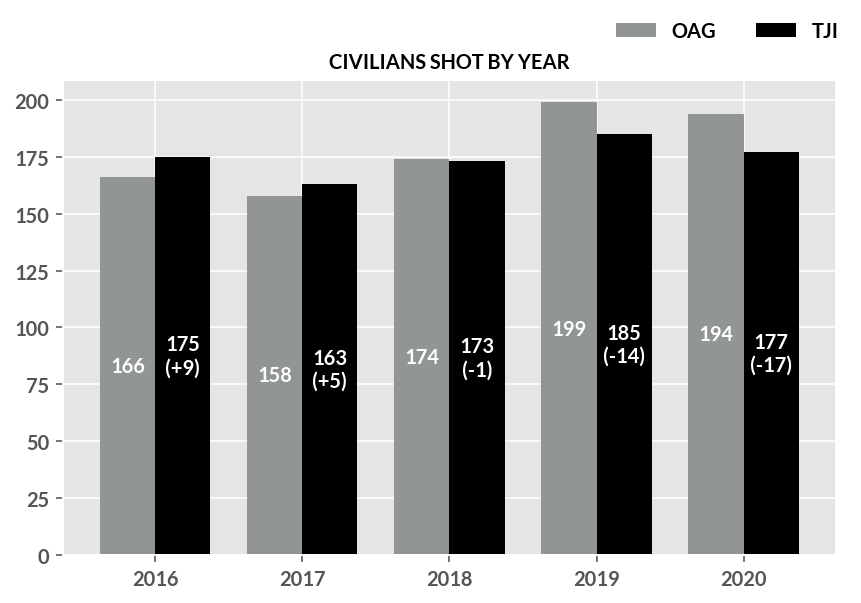

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

df_oga_cd_sum.plot.bar(width=0.75, color=cols_oag_tji, ax=ax, rot=0, legend=False)

# ax.legend(['OAG', 'TJI'], loc='upper left')
ax.set_xticklabels(years, fontsize=10)
ax.set(title='Civilians Shot by Year'.upper())

# annotating
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if i < len(years):
        ax.text(x+width/2, y+height/2, '{:.0f}'.format(height), color='white', fontsize=10,
                horizontalalignment='center', verticalalignment='center')        
    else:
        ax.text(x+width/2, y+height/2, '{:.0f}\n({})'.format(height, diffs[i-len(years)]), color='white', fontsize=10,
                horizontalalignment='center', verticalalignment='center')        

fig.legend(['OAG', 'TJI'], ncol=2, bbox_to_anchor=(1, 1.05), fontsize=10)
fig.tight_layout()
# fig.set_rasterized(True)
# fig.savefig('../Figures/Notebook/Figure_1.eps', bbox_inches='tight')

## Discrepancy between the OAG and TJI datasets: Officer

In [25]:
df_oag_os_sum = df_oag.loc[['O-DEATH', 'O-INJURY'], :].sum(axis=0)
df_os_sum = df_os.groupby('year').count()['date_incident']
print(df_os_sum-df_oag_os_sum)

year
2016    0
2017    0
2018    1
2019    3
2020    0
dtype: int64


# 1. The total number of civilians shot during officer-involved shooting incidents has been increasing over the years, while survival rate has been decreasing.

How much?

In [26]:
for year in years[:-1]:
    print('{} divided by {}:{}x'.format(
        years.max(), 
        year, 
        df_oag_sum.loc[years.max()]/df_oag_sum.loc[year]))

2020 divided by 2016:1.1686746987951808x
2020 divided by 2017:1.2278481012658229x
2020 divided by 2018:1.1149425287356323x
2020 divided by 2019:0.9748743718592965x


No. deaths is increasing over time.

In [27]:
df_cd_year_died = df_cd.groupby(['year', 'civilian_died'])['date_incident'].count().unstack()
df_cd_year_died

civilian_died,DEATH,INJURY
year,,
2016,83,92
2017,83,80
2018,102,71
2019,108,77
2020,96,81


In [28]:
df_cd_year_died.sum(axis=1)

year
2016    175
2017    163
2018    173
2019    185
2020    177
dtype: int64

Below is a line graph that has the same info as Fig. 15A

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


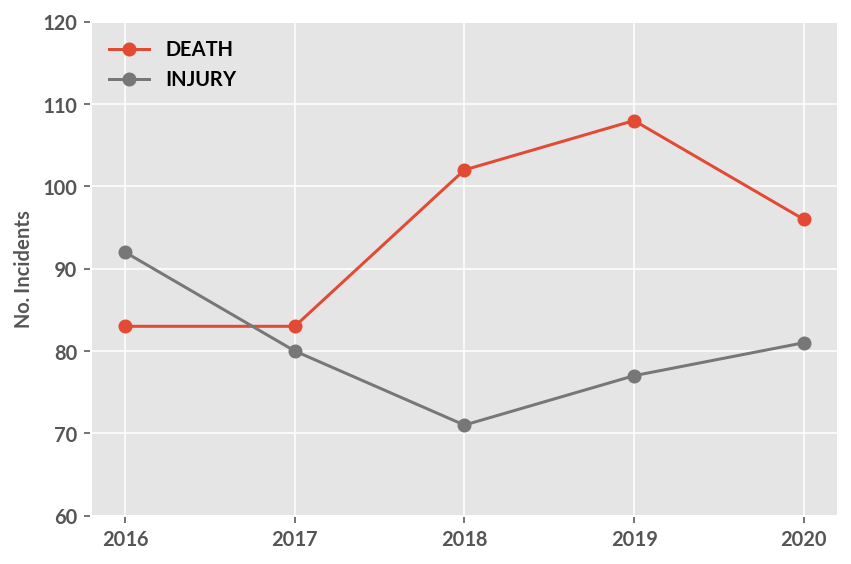

In [29]:
fig, ax = plt.subplots(1, 1)
df_cd_year_died.plot.line(marker='o', color=[colors[0],colors[3]], legend=False, rot=0, ylim=(60, 120), ax=ax)
ax.set_xticklabels(years, fontsize=10)
ax.set(ylabel='No. Incidents', xticks=years, xlabel='')
ax.legend(loc='upper left')
fig.tight_layout();

## Survival rate

$$Survival Rate (\%) = \dfrac{N_{Injured}} {N_{Shot}} * 100$$

`preprocess.pct` convert absolute counts into percentages

In [30]:
??preprocess.pct

Signature: preprocess.pct(df, axis)
Source:   
def pct(df, axis):

    """
    Compute percentage by normalizing based on the total sum
    :param pd.DataFrame df:
    :param int axis: 0 for rows, 1 for columns
    :return: normalized dataframe
    """

    if axis == 1:
        return df.apply(lambda x: x/df.sum(axis=axis))*100
    if axis == 0:
        return df.apply(lambda x: x/df.sum(axis=axis), axis=1)*100
File:      ~/Dropbox/Projects/TJI/officer_involved_shooting/Notebooks/preprocess.py
Type:      function


In [31]:
df_cd_year_died

civilian_died,DEATH,INJURY
year,,
2016,83,92
2017,83,80
2018,102,71
2019,108,77
2020,96,81


How much increase in deaths? 2019 vs. 2016

In [32]:
df_cd_year_died.loc[2019, 'DEATH']/df_cd_year_died.loc[2016, 'DEATH']

1.3012048192771084

Death and injury as percantage per year

In [33]:
df_cd_year_died_pct = preprocess.pct(df_cd_year_died, 1)
df_cd_year_died_pct

civilian_died,DEATH,INJURY
year,,
2016,47.43,52.57
2017,50.92,49.08
2018,58.96,41.04
2019,58.38,41.62
2020,54.24,45.76


###  FIGURE 15. CIVILIANS SHOT BY SEVERITY AND SURVIVAL RATES

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


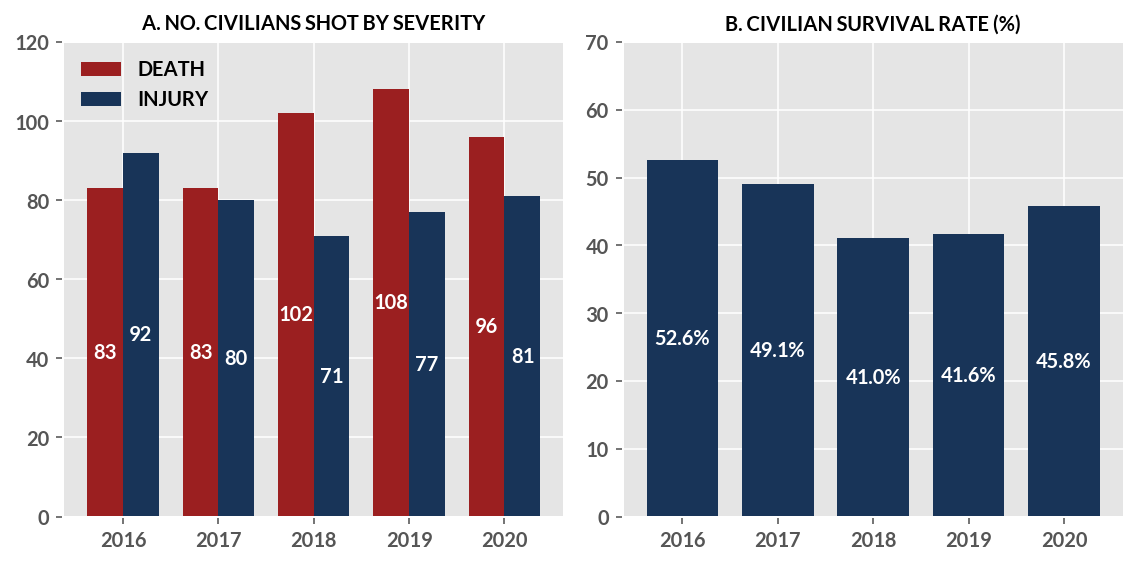

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
df_cd_year_died.plot.bar(color=cols_deaths_injury, legend=False, rot=0, ylim=(0, 120), width=0.75, ax=axes[0])

for i, p in enumerate(axes[0].patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[0].text(x+width/2, y+height/2, '{:.0f}'.format(height), color='white', fontsize=10,
                 horizontalalignment='center', verticalalignment='center')        
axes[0].set(title='A. No. Civilians Shot by Severity'.upper(), xlabel='')
axes[0].legend(loc='upper left')

df_cd_year_died_pct['INJURY'].plot.bar(color=cols_deaths_injury[1], legend=False, rot=0, ylim=(0, 70), ax=axes[1], width=0.75)
plot.annotate(axes[1], 'v', unit='percent', fontsize=10)
axes[1].set(title='B. Civilian Survival Rate (%)'.upper(), xlabel='')
axes[1].set_xticklabels(years, fontsize=10)

fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_15.eps', bbox_inches='tight')

## Survival rate at a state level
Severity information is in `civilian_died` in the civilian data and `officer_harm` in the officer data.

In [35]:
df_cd_os_harm = pd.concat([df_cd['civilian_died'].value_counts(), df_os['officer_harm'].value_counts()], axis=1).T
df_cd_os_harm_pct = preprocess.pct(df_cd_os_harm, 1)

Count

In [36]:
df_cd_os_harm

,DEATH,INJURY
civilian_died,472,401
officer_harm,29,138


Proportion

In [37]:
df_cd_os_harm_pct

,DEATH,INJURY
civilian_died,54.07,45.93
officer_harm,17.37,82.63


Compute the proportion for the top 5 counties

In [38]:
df_cd_survival_top5_pct = preprocess.pct(df_cd_top5.groupby(['civilian_died', 'incident_county'])['date_incident'].count().unstack().fillna(0), 0)
df_os_survival_top5_pct = preprocess.pct(df_os_top5.groupby(['officer_harm', 'incident_county'])['date_incident'].count().unstack().fillna(0), 0)
df_survival_top5_pct = pd.concat([df_cd_survival_top5_pct.loc['INJURY', top5_locs], 
                                  df_os_survival_top5_pct.loc['INJURY', top5_locs]], axis=1)
df_survival_top5_pct.columns = ['Civilian', 'Officer']

In [39]:
df_cd_survival_top5_pct

incident_county,BEXAR,DALLAS,HARRIS,TARRANT,TRAVIS
civilian_died,,,,,
DEATH,53.68,53.25,45.35,51.67,64.71
INJURY,46.32,46.75,54.65,48.33,35.29


In [40]:
df_os_survival_top5_pct

incident_county,BEXAR,DALLAS,HARRIS,TARRANT,TRAVIS
officer_harm,,,,,
DEATH,12.5,27.27,13.89,18.18,0.0
INJURY,87.5,72.73,86.11,81.82,100.0


Merging them into one dataframe for plotting

In [41]:
df_survival_top5_pct

,Civilian,Officer
incident_county,,
HARRIS,54.65,86.11
BEXAR,46.32,87.50
DALLAS,46.75,72.73
TARRANT,48.33,81.82
TRAVIS,35.29,100.00


# 2. Survival rate of officers is almost twice as high as that of civilians.

Computing survial rate of civilian and officer by year

In [42]:
civilian_survival_rate_by_year = preprocess.pct(df_cd.groupby(['civilian_died', 'year'])['date_incident'].count().unstack(), 0).loc['INJURY']
officer_survival_rate_by_year = preprocess.pct(df_os.groupby(['officer_harm', 'year'])['date_incident'].count().unstack(), 0).loc['INJURY']
survival_rate_by_year = pd.concat([civilian_survival_rate_by_year, officer_survival_rate_by_year], axis=1)
survival_rate_by_year.columns = ['Civilian', 'Officer']
survival_rate_by_year

,Civilian,Officer
year,,
2016,52.57,81.08
2017,49.08,80.77
2018,41.04,88.46
2019,41.62,81.40
2020,45.76,82.86


### FIGURE 16. CIVILIAN AND OFFICER SURVIVAL RATES

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


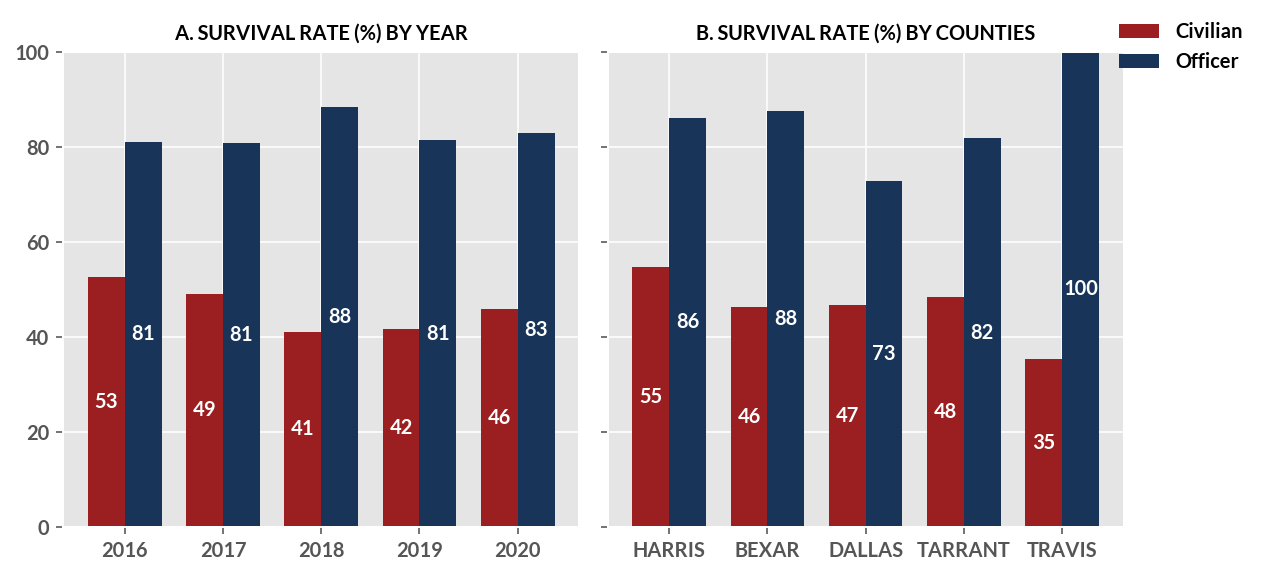

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

survival_rate_by_year.plot.bar(ax=axes[0], rot=0, legend=False, color=cols_civilian_officer, width=0.75)
plot.annotate(axes[0], 'v')
axes[0].set(ylim=(0, 100), xlabel=None, ylabel=None)
axes[0].set_xticklabels(years, fontsize=10)

topN = df_cd['incident_county'].value_counts()[:5].index
temp_cd = df_cd.groupby(['civilian_died', 'incident_county'])['date_incident'].count().unstack().loc[:, topN].T
temp_os = df_os.groupby(['officer_harm', 'incident_county'])['date_incident'].count().unstack().loc[:, topN].T
survival_rate_top5 = pd.concat([temp_cd['INJURY']/temp_cd.sum(axis=1)*100,
                                temp_os['INJURY']/temp_os.sum(axis=1)*100], axis=1)
survival_rate_top5.columns = ['Civilian', 'Officer']
survival_rate_top5.plot.bar(rot=0, width=0.75, ax=axes[1], color=cols_civilian_officer, legend=False)
plot.annotate(axes[1], 'v')

axes[0].set_title('A. Survival Rate (%) by Year'.upper())
axes[1].set_title('B. Survival Rate (%) by Counties'.upper())

fig.legend(['Civilian', 'Officer'], ncol=1, bbox_to_anchor=(1.1, 1), fontsize=10)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_16.eps', bbox_inches='tight')

# 3. In the five most populous counties, among civilians shot during officer-involved shooting incidents, Black civilians were overrepresented.

## Severity and race (state level): white civilians are shot most

In [44]:
df_cd_race_survival_year = df_cd.groupby(['civilian_race', 'civilian_died', 'year'])['date_incident'].count().unstack().fillna(0)
df_cd_race_survival_year

year                         2016  2017  2018  2019  2020
civilian_race civilian_died                              
BLACK         DEATH          20.0  18.0  21.0  29.0  28.0
              INJURY         32.0  22.0  27.0  25.0  28.0
HISPANIC      DEATH          22.0  28.0  46.0  28.0  32.0
              INJURY         30.0  30.0  18.0  26.0  31.0
OTHER         DEATH           2.0   3.0   5.0   5.0   1.0
              INJURY          2.0   0.0   0.0   4.0   2.0
WHITE         DEATH          39.0  34.0  30.0  46.0  35.0
              INJURY         28.0  28.0  26.0  22.0  20.0

Example of how to query this multi-index dataframe

In [45]:
df_cd_race_survival_year[2016].unstack().loc[race_list, :]

civilian_died,DEATH,INJURY
civilian_race,,
WHITE,39.0,28.0
BLACK,20.0,32.0
HISPANIC,22.0,30.0
OTHER,2.0,2.0


### FIGURE 17A. CIVILIANS SHOT BY RACE, YEAR AND SEVERITY (ALL COUNTIES)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:40

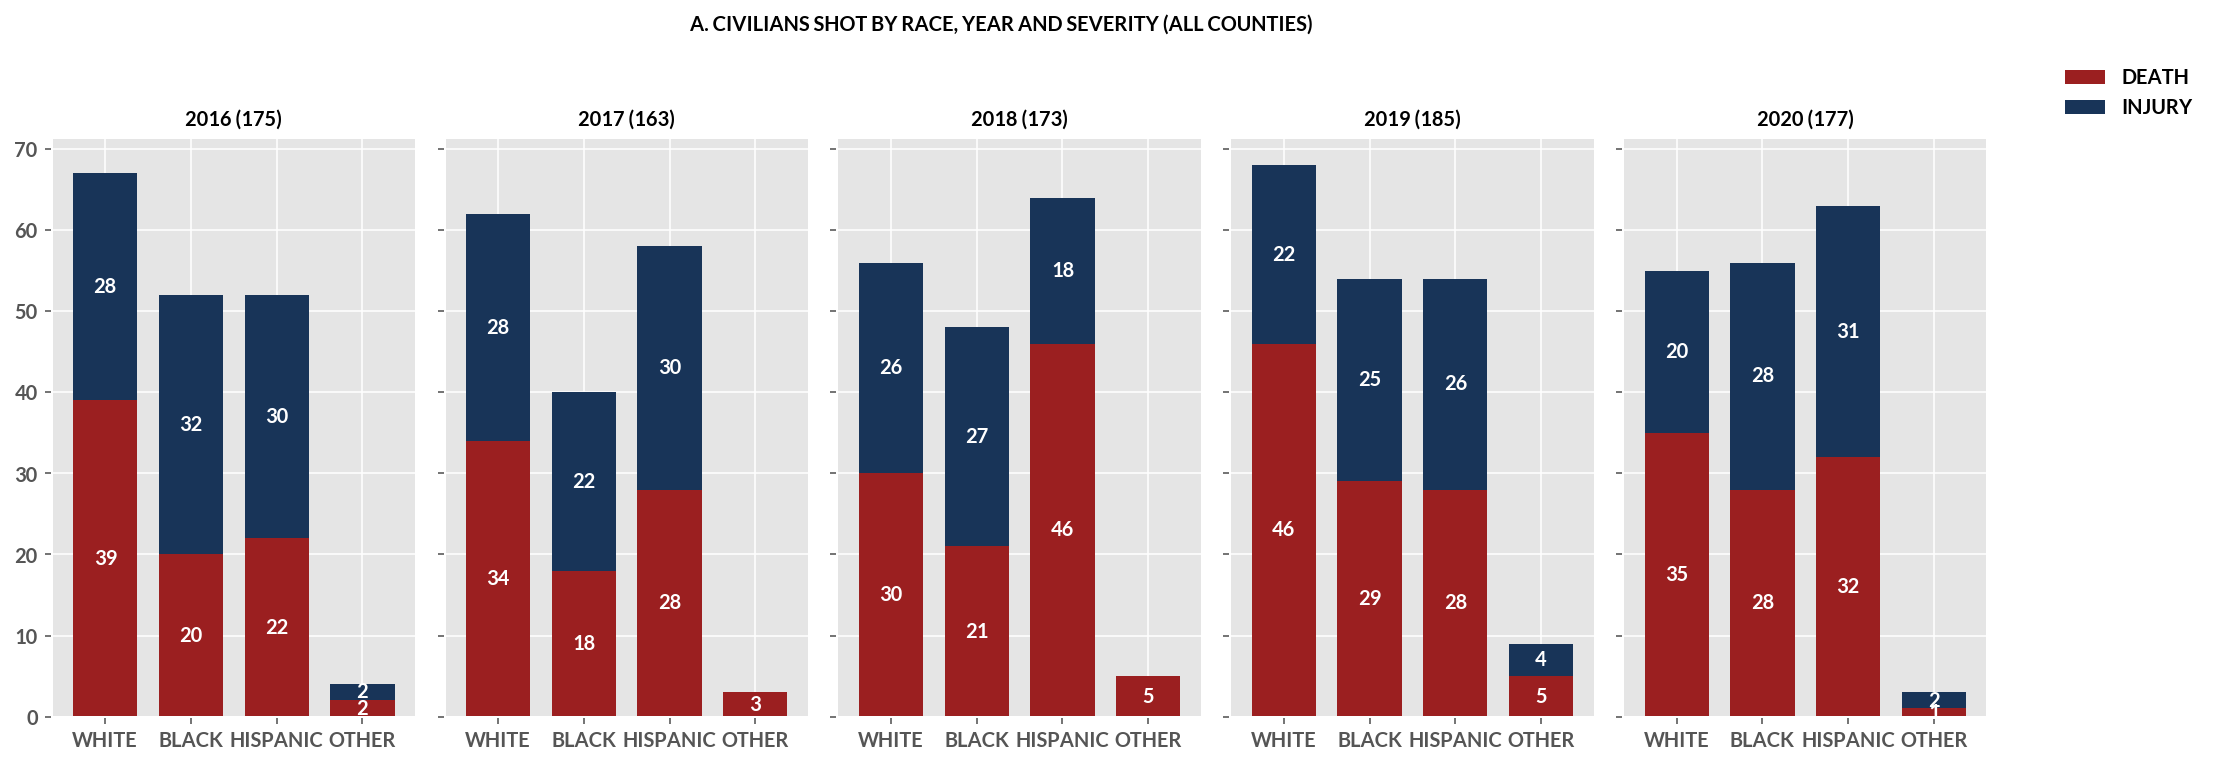

In [46]:
fig, axes = plt.subplots(1, len(years), figsize=(width_heatmap, 5), sharey=True)

for i, (year, ax) in enumerate(zip(years, axes)):
    df_cd_race_survival_year[year].unstack().loc[race_list, :].plot.bar(
        stacked=True, color=cols_deaths_injury, legend=False, width=0.75, rot=0, ax=ax)
    plot.annotate(ax, 'v', fontsize=10)
    ax.set(xlabel='', title='{} ({})'.format(year, (df_cd['year']==year).sum()))

fig.suptitle('A. Civilians shot by race, year and severity (all counties)'.upper(), x=0.5, y=1.05)
fig.legend(['DEATH', 'INJURY'], ncol=1, bbox_to_anchor=(1.1, 1), fontsize=10)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_17A.eps', bbox_inches='tight')

## Top 5 counties: non-white (mostly Black) civilians shot most

In [47]:
df_cd_race_survival_year_top5 = df_cd_top5.groupby(['civilian_race', 'civilian_died', 'year'])['date_incident'].count().unstack().fillna(0)
df_cd_race_survival_year_top5

year                         2016  2017  2018  2019  2020
civilian_race civilian_died                              
BLACK         DEATH          14.0  10.0  16.0  18.0  18.0
              INJURY         25.0  17.0  19.0  14.0  21.0
HISPANIC      DEATH          14.0  15.0  22.0  13.0  11.0
              INJURY         16.0  17.0  10.0  12.0  11.0
OTHER         DEATH           0.0   0.0   5.0   3.0   1.0
              INJURY          1.0   0.0   0.0   3.0   2.0
WHITE         DEATH          13.0  15.0   9.0  15.0  11.0
              INJURY          8.0  10.0  13.0   8.0   8.0

### FIGURE 17B. CIVILIANS SHOT BY RACE, YEAR AND SEVERITY (TOP 5 COUNTIES)

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


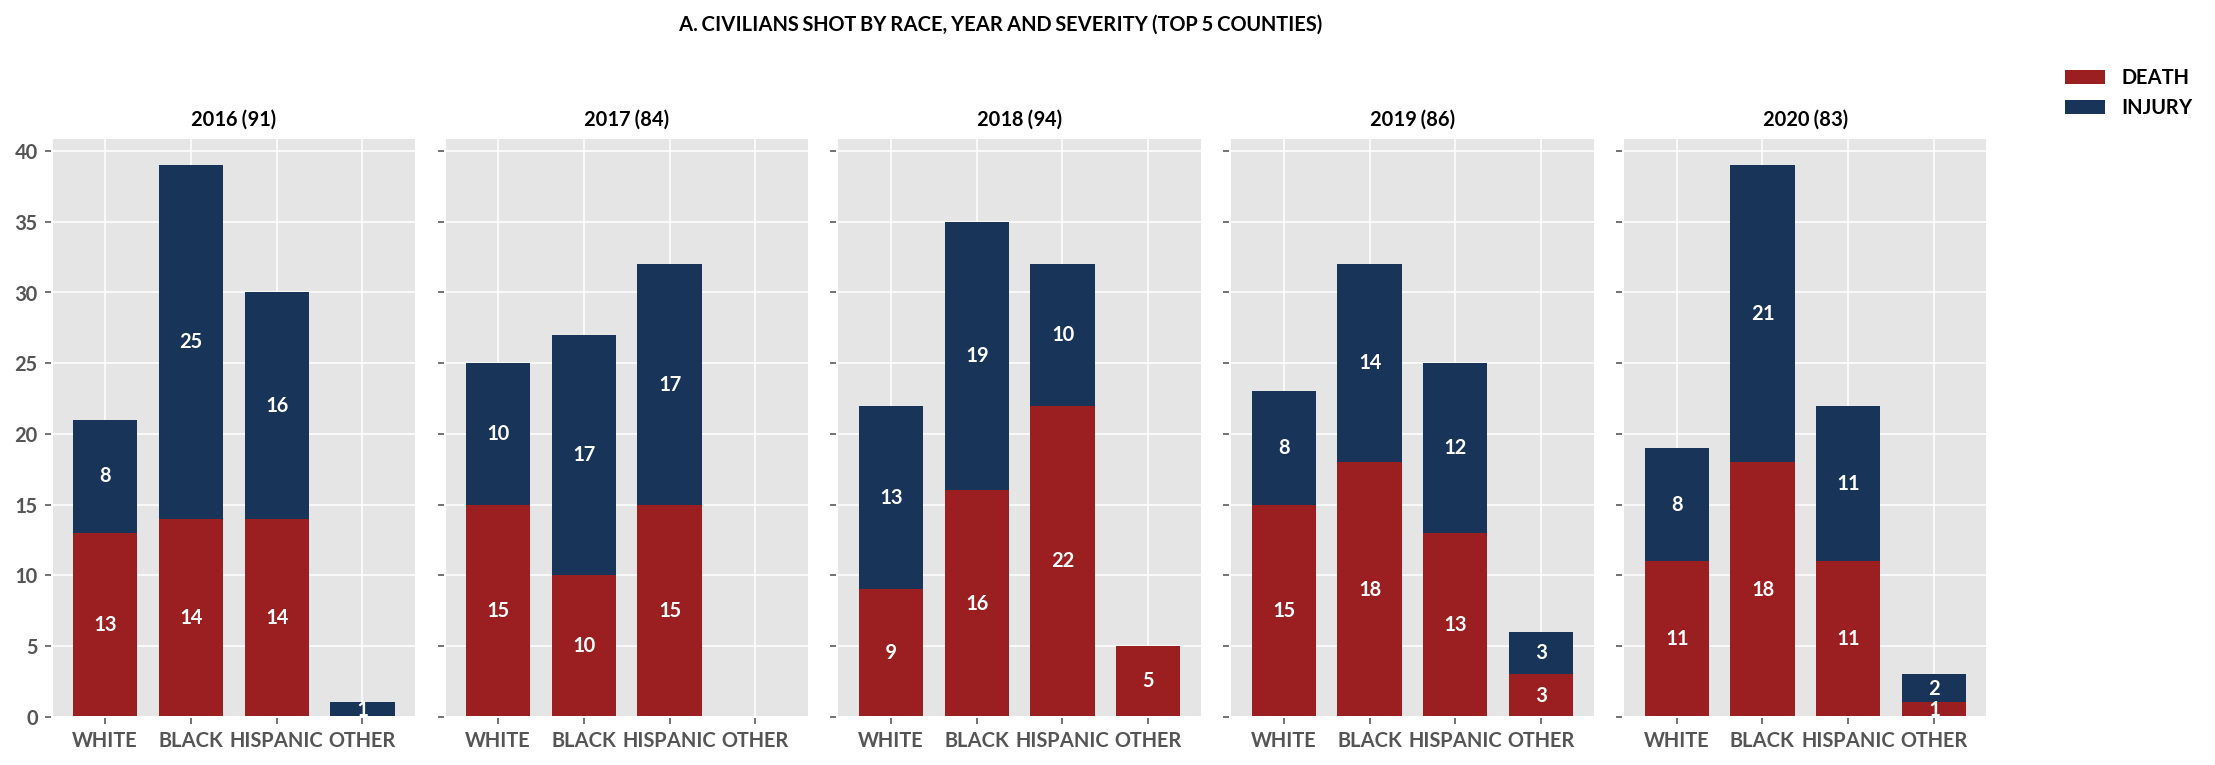

In [48]:
fig, axes = plt.subplots(1, len(years), figsize=(width_heatmap, 5), sharey=True)

for i, (year, ax) in enumerate(zip(years, axes)):
    df_cd_race_survival_year_top5[year].unstack().loc[race_list, :].plot.bar(
        stacked=True, color=cols_deaths_injury, legend=False, width=0.75, rot=0, ax=ax)
    plot.annotate(ax, 'v', fontsize=10)
    ax.set(xlabel='', title='{} ({})'.format(year, df_cd_race_survival_year_top5[year].sum().astype(int)))

fig.suptitle('A. Civilians shot by race, year and severity (top 5 counties)'.upper(), x=0.5, y=1.05)
fig.legend(['DEATH', 'INJURY'], ncol=1, bbox_to_anchor=(1.1, 1), fontsize=10)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_17B.eps', bbox_inches='tight')

## Comparison of the state vs. top 5 by race

In [49]:
race_all = df_cd['civilian_race'].value_counts().loc[race_list]
race_top5 = df_cd_top5['civilian_race'].value_counts().loc[race_list]

State

In [50]:
race_all/race_all.sum()

WHITE       0.35
BLACK       0.29
HISPANIC    0.33
OTHER       0.03
Name: civilian_race, dtype: float64

Top 5 counties

In [51]:
race_top5/race_top5.sum()

WHITE       0.25
BLACK       0.39
HISPANIC    0.32
OTHER       0.03
Name: civilian_race, dtype: float64

Higher proportion of Black civilians in the top 5 counties

## Race demographics comparison: general population vs. OIS (top 5)

Count

In [52]:
df_cd_top5.groupby(['incident_county', 'civilian_race'])['date_incident'].count().unstack().fillna(0).loc[top5_locs, race_list]

civilian_race,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,35,87,45,5
BEXAR,20,19,52,4
DALLAS,16,38,20,3
TARRANT,27,18,13,2
TRAVIS,12,10,11,1


Proportion (sum is 100 by row)

In [53]:
preprocess.pct(df_cd_top5.groupby(['incident_county', 'civilian_race'])['date_incident'].count().unstack().fillna(0).loc[top5_locs, race_list], 1)

civilian_race,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,20.35,50.58,26.16,2.91
BEXAR,21.05,20.00,54.74,4.21
DALLAS,20.78,49.35,25.97,3.90
TARRANT,45.00,30.00,21.67,3.33
TRAVIS,35.29,29.41,32.35,2.94


In [54]:
df_cd_race_county_top5_pct = preprocess.crosstab_by_topN_cities(df_cd, 'civilian_race', 'incident_county', N=5, ratio=True)*100
df_cd_race_county_top5_total = preprocess.crosstab_by_topN_cities(df_cd, 'civilian_race', 'incident_county', N=5, ratio=False)['TOTAL']
df_census_top5_pct = df_census_pct.loc[df_cd_race_county_top5_pct.index, :]

In [55]:
df_cd_race_county_top5_total

incident_county
HARRIS     172
BEXAR       95
DALLAS      77
TARRANT     60
TRAVIS      34
Name: TOTAL, dtype: int64

In [56]:
df_cd_race_county_top5_pct

civilian_race,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,20.35,50.58,26.16,2.91
BEXAR,21.05,20.00,54.74,4.21
DALLAS,20.78,49.35,25.97,3.90
TARRANT,45.00,30.00,21.67,3.33
TRAVIS,35.29,29.41,32.35,2.94


In [57]:
df_census_top5_pct

,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,29.54,18.55,42.46,9.45
BEXAR,27.34,7.29,60.32,5.05
DALLAS,28.81,22.54,40.08,8.57
TARRANT,46.64,16.13,28.78,8.45
TRAVIS,48.10,8.14,34.62,9.14


We will be using `plot_stackedbar_compare_ratio` a lot to plot stacked bar graphs for race demographics in proportion.

### FIGURE 18. CIVILIANS SHOT COMPARED TO GENERAL POPULATION
Figure legend is not shown but red-white, blue-Black, dark gray-Hispanic, and light gray-other.

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


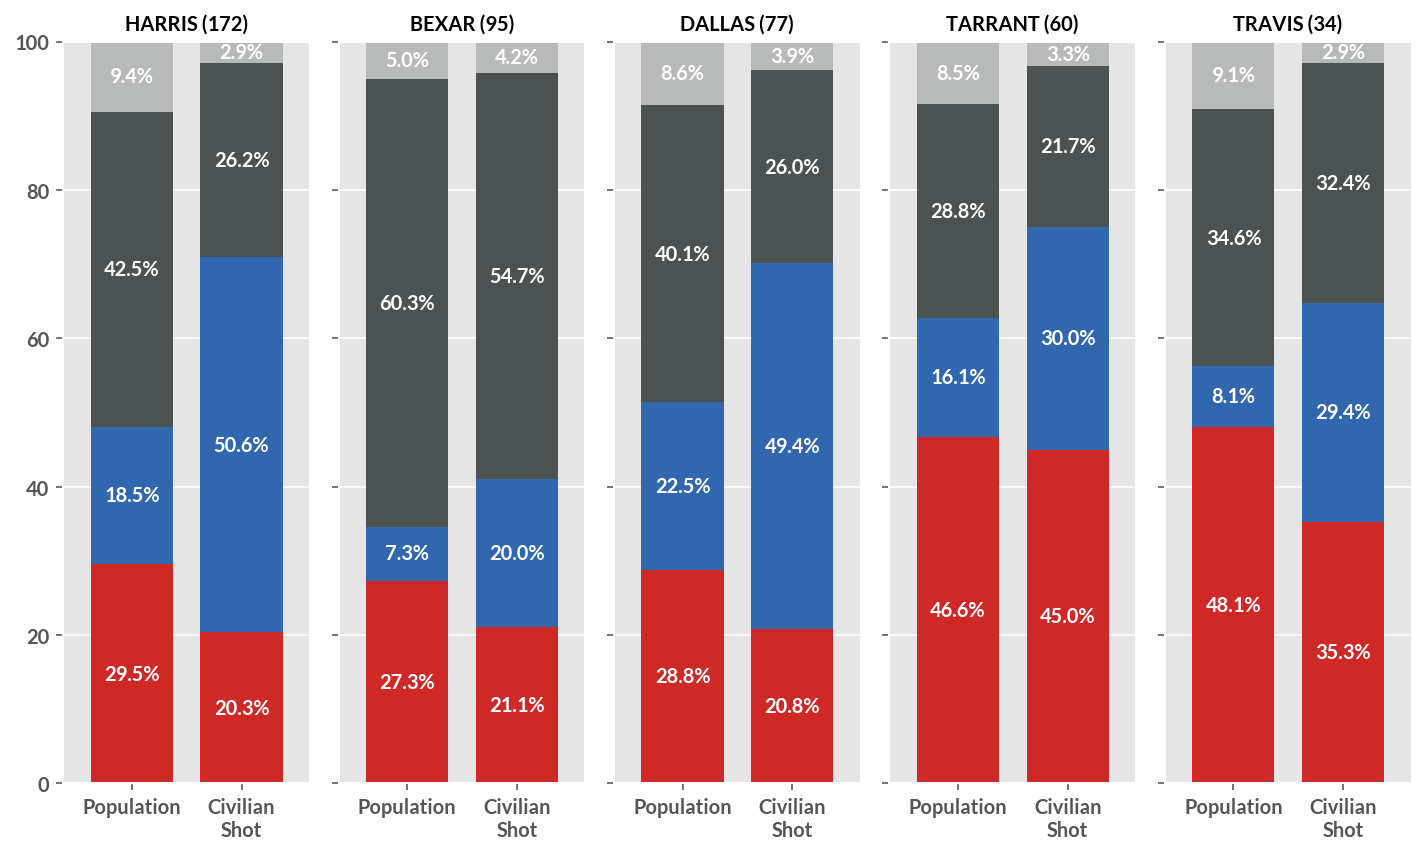

In [58]:
plot.plot_stackedbar_compare_ratio(df_cd_race_county_top5_pct, 
                                   df_census_top5_pct, 
                                   df_cd_race_county_top5_total, 
                                   legend=False,
                                   figsize=(10, 6))
#                                    fname='../Figures/Notebook/Figure_18.eps')

# 4. In the five most populous counties, among male civilians fatally shot by law enforcement, non-white civilians were overrepresented.

Female data is very sparse.

In [59]:
df_death_female = df_cd.loc[(df_cd['civilian_died']=='DEATH') & (df_cd['civilian_gender']=='FEMALE')]
df_cd_death_age_female = pd.crosstab(df_death_female['civilian_age_binned'], df_death_female['civilian_race']); df_cd_death_age_female

civilian_race,BLACK,HISPANIC,WHITE
civilian_age_binned,,,
2,0,1,1
3,3,2,7
4,2,2,3
5,0,1,4
6,0,0,3
7,0,0,2
8,0,1,0


In [60]:
df_cd_died['civilian_gender'].value_counts()/df_cd_died['civilian_gender'].value_counts().sum()

MALE      0.93
FEMALE    0.07
Name: civilian_gender, dtype: float64

Since female data is a very small fraction, **we are focusing on male civilians** only for the comparitive analyses, mortality-wise.

In [61]:
# mortality data by county
df_death_county.loc[top5_locs, :] 

,WHITE,BLACK,HISPANIC,OTHER,TOTAL
County,,,,,
HARRIS,12752,5698,4265,1277,23992
BEXAR,5469,980,5560,322,12331
DALLAS,8704,3985,1977,482,15148
TARRANT,8726,1514,1117,299,11656
TRAVIS,3424,538,863,137,4962


Computing the mortality data by race in proportion

In [62]:
df_census_died_top5_pct = (preprocess.pct(df_death_county.drop('TOTAL', axis=1), 1)).loc[top5_locs, :]
df_cd_died_male = df_cd_died.loc[df_cd['civilian_gender']=='MALE', :]
df_cd_died_male_top5 = df_cd_died_male.groupby(['incident_county', 'civilian_race'])['date_incident'].count().unstack().fillna(0).loc[top5_locs, race_list]
df_cd_died_male_top5_pct = preprocess.pct(df_cd_died_male_top5, 1)

Mortality in proportion for top 5 counties

In [63]:
df_census_died_top5_pct

,WHITE,BLACK,HISPANIC,OTHER
County,,,,
HARRIS,53.15,23.75,17.78,5.32
BEXAR,44.35,7.95,45.09,2.61
DALLAS,57.46,26.31,13.05,3.18
TARRANT,74.86,12.99,9.58,2.57
TRAVIS,69.00,10.84,17.39,2.76


Mortality in *count* in OIS for top 5 counties

In [64]:
df_cd_died_male_top5

civilian_race,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,19.0,34.0,17.0,4.0
BEXAR,9.0,7.0,30.0,1.0
DALLAS,10.0,18.0,10.0,1.0
TARRANT,10.0,9.0,7.0,2.0
TRAVIS,6.0,5.0,7.0,1.0


Mortality in *proportion* in OIS for top 5 counties

In [65]:
df_cd_died_male_top5_pct

civilian_race,WHITE,BLACK,HISPANIC,OTHER
incident_county,,,,
HARRIS,25.68,45.95,22.97,5.41
BEXAR,19.15,14.89,63.83,2.13
DALLAS,25.64,46.15,25.64,2.56
TARRANT,35.71,32.14,25.00,7.14
TRAVIS,31.58,26.32,36.84,5.26


### FIGURE 19. MORTALITY BY RACE IN GENERAL POPULATION VS. OIS BY COUNTY

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


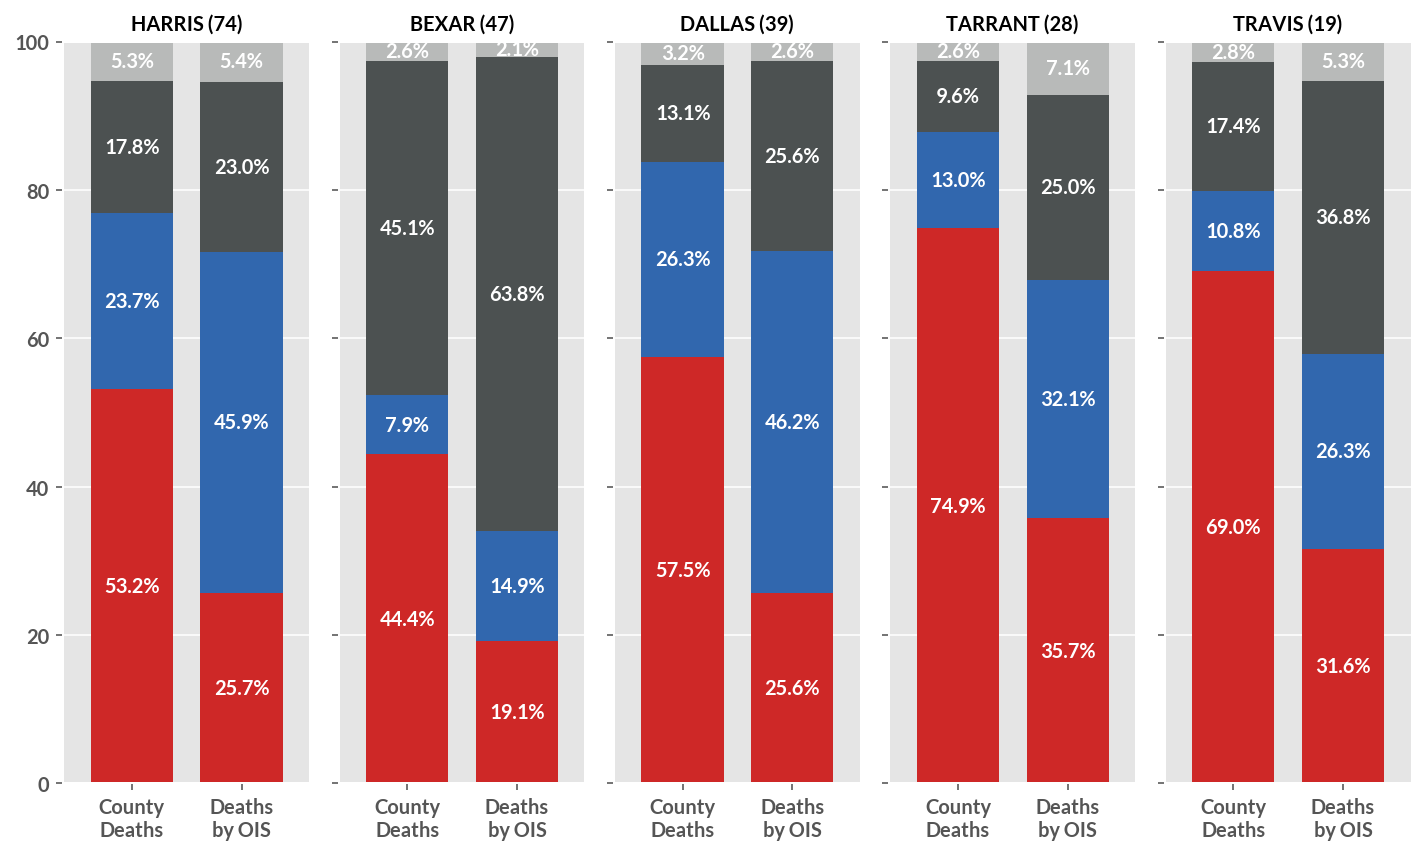

In [66]:
plot.plot_stackedbar_compare_ratio(df_cd_died_male_top5_pct,
                                   df_census_died_top5_pct,
                                   df_cd_died_male_top5.sum(axis=1).astype(int),
                                   severity='Deaths', 
                                   legend=False,
                                   figsize=(10, 6),)
#                                    fname='../Figures/Notebook/Figure_19.eps')

# 5. The racial makeup of individuals fatally shot by law enforcement in Texas varies based on the age of the civilians. A disproportionate amount of young Black civilians were fatally shot by law enforcement.

## Race demographics comparison: morality vs. OIS deaths *by age*

In [67]:
df_cd_died_male_age = df_cd_died.loc[df_cd_died['civilian_gender']=='MALE'].groupby(['civilian_age_binned', 'civilian_race'])['date_incident'].count().unstack().fillna(0)[race_list]
df_cd_died_male_age_pct = preprocess.pct(df_cd_died_male_age, 1)[race_list]

In [68]:
df_cd_died_male_age

civilian_race,WHITE,BLACK,HISPANIC,OTHER
civilian_age_binned,,,,
1,1.0,0.0,0.0,0.0
2,12.0,36.0,32.0,4.0
3,52.0,35.0,51.0,3.0
4,33.0,30.0,33.0,5.0
5,36.0,4.0,19.0,4.0
6,22.0,4.0,10.0,0.0
7,5.0,2.0,2.0,0.0
8,3.0,0.0,0.0,0.0
9,0.0,0.0,2.0,0.0


Sanity check:
- The `civilian_age_binned` can be a bit confusing because we have to know what age group they are associated with. Currently our focus is the label of *2*. It corresponds to the age group 15-24.

In [69]:
print(df_cd.loc[df_cd['civilian_age_binned']==2, 'civilian_age'].min())
print(df_cd.loc[df_cd['civilian_age_binned']==2, 'civilian_age'].max())

15.0
24.0


We're interested in age 15-24 to age 55-64 (decent sample size). This corresponds to index 2 to 6.

In [70]:
inds_age_binned = np.arange(2, 7)
df_cd_died_male_age_binned = df_cd_died_male_age.loc[inds_age_binned, :].drop('OTHER', axis=1)
df_death_age_male_binned = df_death_age_male.iloc[inds_age_binned, :].drop('TOTAL', axis=1)

Why no others? Simply because the morality data by age doesn't provide Other category

In [71]:
df_cd_died_male_age.loc[inds_age_binned, :]

civilian_race,WHITE,BLACK,HISPANIC,OTHER
civilian_age_binned,,,,
2,12.0,36.0,32.0,4.0
3,52.0,35.0,51.0,3.0
4,33.0,30.0,33.0,5.0
5,36.0,4.0,19.0,4.0
6,22.0,4.0,10.0,0.0


In [72]:
df_cd_died_male_age_binned

civilian_race,WHITE,BLACK,HISPANIC
civilian_age_binned,,,
2,12.0,36.0,32.0
3,52.0,35.0,51.0
4,33.0,30.0,33.0
5,36.0,4.0,19.0
6,22.0,4.0,10.0


Mortality data by age

In [73]:
df_death_age_male.iloc[inds_age_binned, :].drop('TOTAL', axis=1)

,WHITE,BLACK,HISPANIC
Age,,,
15-24,811,297,700
25-34,1210,505,917
35-44,1755,628,1199
45-54,4788,1333,2449
55-64,9925,2435,3426


In [74]:
df_cd_died_male_age_binned_pct = preprocess.pct(df_cd_died_male_age_binned, 1)
df_death_age_male_binned_pct = preprocess.pct(df_death_age_male_binned, 1)

df_cd_died_male_age_binned_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]
df_death_age_male_binned_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]

### FIGURE 20. MORTALITY BY AGE IN GENERAL POPULATION VS. OIS BY COUNTY

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


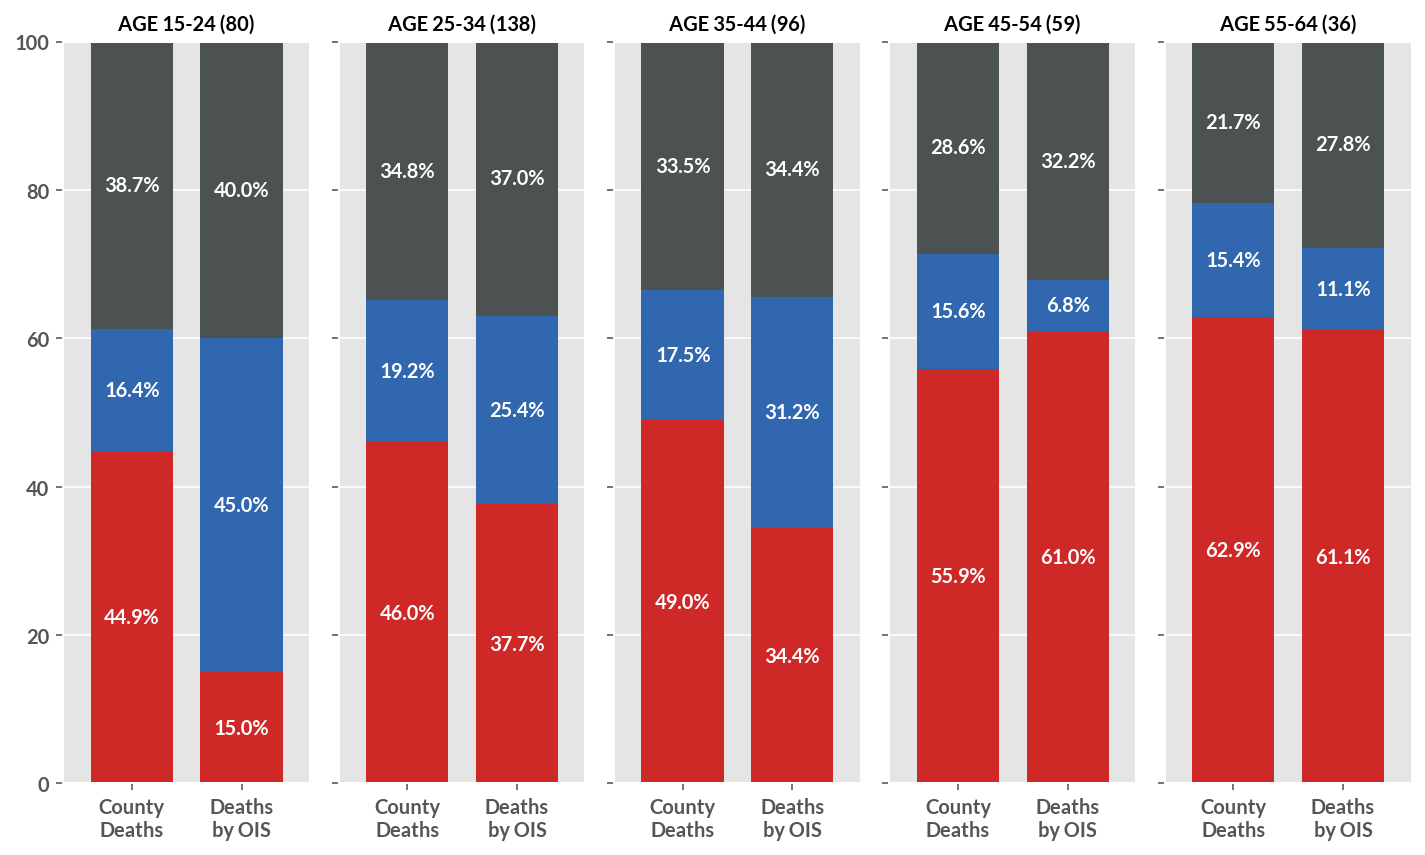

In [75]:
plot.plot_stackedbar_compare_ratio(df_cd_died_male_age_binned_pct,
                                   df_death_age_male_binned_pct,
                                   df_cd_died_male_age_binned.sum(axis=1).astype(int), 
                                   severity='Deaths', 
                                   legend=False,
                                   figsize=(10, 6),)
#                                    fname='../Figures/Notebook/Figure_20.eps')

## Identifying the location of deaths of young Black civilians

In [76]:
df_cd_black_youth_died = df_cd.loc[(df_cd['civilian_age_binned']==2) & 
                                   (df_cd['civilian_race']=='BLACK') &
                                   (df_cd['civilian_gender']=='MALE') &
                                   (df_cd['died']==1), :]

In [77]:
inds_in_order = df_cd_black_youth_died['incident_county'].value_counts().index
df_cd_black_youth_count_died = df_cd_black_youth_died.groupby(['incident_county', 'year'])['date_incident'].count().unstack().fillna(0)

In [78]:
df_cd_black_youth_count_died.loc[inds_in_order]

year,2016,2017,2018,2019,2020
HARRIS,2.0,1.0,2.0,3.0,0.0
TARRANT,0.0,2.0,2.0,4.0,0.0
TRAVIS,1.0,1.0,1.0,1.0,0.0
FORT BEND,0.0,0.0,0.0,2.0,0.0
DALLAS,0.0,1.0,1.0,0.0,0.0
DENTON,0.0,1.0,0.0,0.0,1.0
GRAYSON,0.0,0.0,0.0,0.0,1.0
BELL,0.0,1.0,0.0,0.0,0.0
WILBARGER,0.0,0.0,1.0,0.0,0.0
SHERMAN,0.0,0.0,1.0,0.0,0.0


In [79]:
df_cd_black_youth_count_died.sum().sum()

36.0

### FIGURE 21. DEATHS OF BLACK MALE CIVILIANS AGES 15-24 BY COUNTY

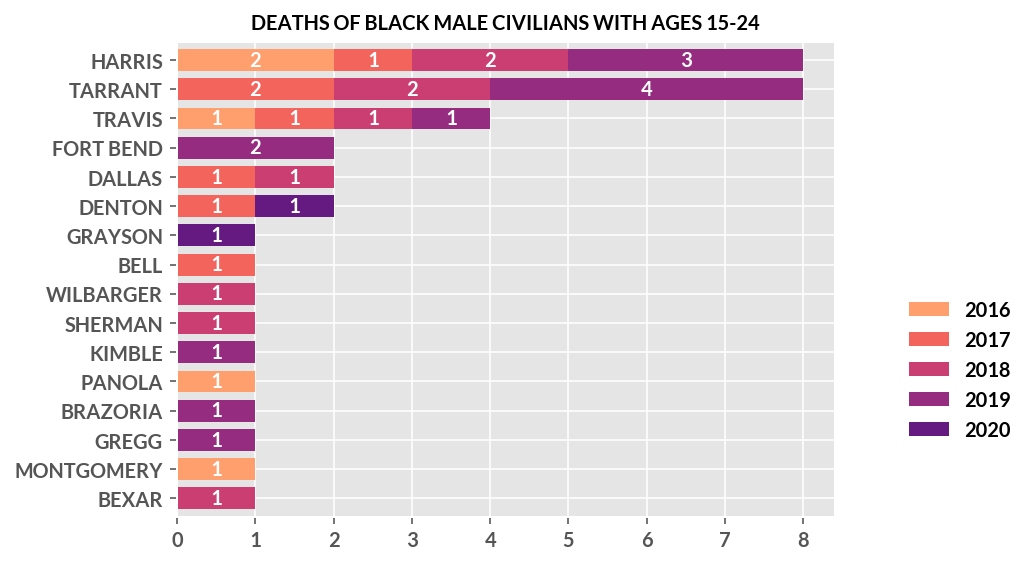

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df_cd_black_youth_count_died.loc[inds_in_order[::-1], :].plot.barh(stacked=True, color=cols_year, width=0.75, ax=ax, legend=False)
plot.annotate(ax, 'h', threshold=0)
ax.set_title('Deaths of Black Male Civilians with Ages 15-24'.upper(), fontsize=10)

fig.tight_layout()
fig.legend(years, ncol=1, bbox_to_anchor=(1.2, 0.5), fontsize=10)
# fig.savefig('../Figures/Notebook/Figure_21.eps', bbox_inches='tight')

Sanity check for 2020: A lot of black people were shot in Harris county in 2020.

In [81]:
black_harris_2020 = df_cd.loc[
    (df_cd['year']==2020) & 
    (df_cd['incident_county']=='HARRIS') &
    (df_cd['civilian_race']=='BLACK')]

In [82]:
black_harris_2020[incident_causes_list].sum(axis=0)

Traffic Stop                          2
Emergency/Request for Assistance     10
Execution of a Warrant                1
Hostage/Barricade/Other Emergency     0
Other                                 9
dtype: int64

In [83]:
black_harris_2020['civilian_age_binned'].value_counts().sort_index()

2     3
3    13
4     4
5     2
Name: civilian_age_binned, dtype: int64

In [84]:
black_harris_died_2020 = df_cd.loc[
    (df_cd['died']==1) &
    (df_cd['year']==2020) & 
    (df_cd['incident_county']=='HARRIS') &
    (df_cd['civilian_race']=='BLACK')]

In [85]:
black_harris_died_2020[incident_causes_list].sum(axis=0)

Traffic Stop                         1
Emergency/Request for Assistance     7
Execution of a Warrant               0
Hostage/Barricade/Other Emergency    0
Other                                3
dtype: int64

In [86]:
black_harris_died_2020['civilian_age_binned'].value_counts().sort_index()

3    6
4    4
5    1
Name: civilian_age_binned, dtype: int64

Sanity check

In [87]:
df_cd_black_youth_count_died_detail = df_cd_black_youth_died[['civilian_race', 
                                                              'civilian_died', 
                                                              'civilian_name_full', 
                                                              'civilian_age',
                                                              'incident_county']].sort_values(by='civilian_age')

In [88]:
df_cd_black_youth_count_died_detail.shape[0]

36

List of the names of these young Black men

In [89]:
df_cd_black_youth_count_died_detail

,civilian_race,civilian_died,civilian_name_full,civilian_age,incident_county
308,BLACK,DEATH,JORDAN EDWARDS,15.0,DALLAS
301,BLACK,DEATH,DAEZION CHRISTIAN PAUL TURNER,15.0,BELL
695,BLACK,DEATH,ARIC RASHAD MOODY,16.0,HARRIS
303,BLACK,DEATH,KENDELL MARQUIS WILSON,16.0,HARRIS
523,BLACK,DEATH,JALON GREGORY JOHNSON,17.0,HARRIS
497,BLACK,DEATH,JESSE DARIAN CARRILLO,17.0,DALLAS
82,BLACK,DEATH,DAVID JOSEPH,17.0,TRAVIS
224,BLACK,DEATH,ELIJAH MARK COBB,17.0,MONTGOMERY
716,BLACK,DEATH,BRANDON BELL,17.0,HARRIS
700,BLACK,DEATH,DETRAVIAN DEVANTAE ALLISON,18.0,GREGG


## Age at time of death and race demographics

Median age at the time of death

In [90]:
df_cd_died.groupby('civilian_race')['civilian_age'].median()[race_list]

civilian_race
WHITE       38.5
BLACK       30.0
HISPANIC    33.0
OTHER       37.5
Name: civilian_age, dtype: float64

### FIGURE 22. AGE OF DEATH ACROSS RACE

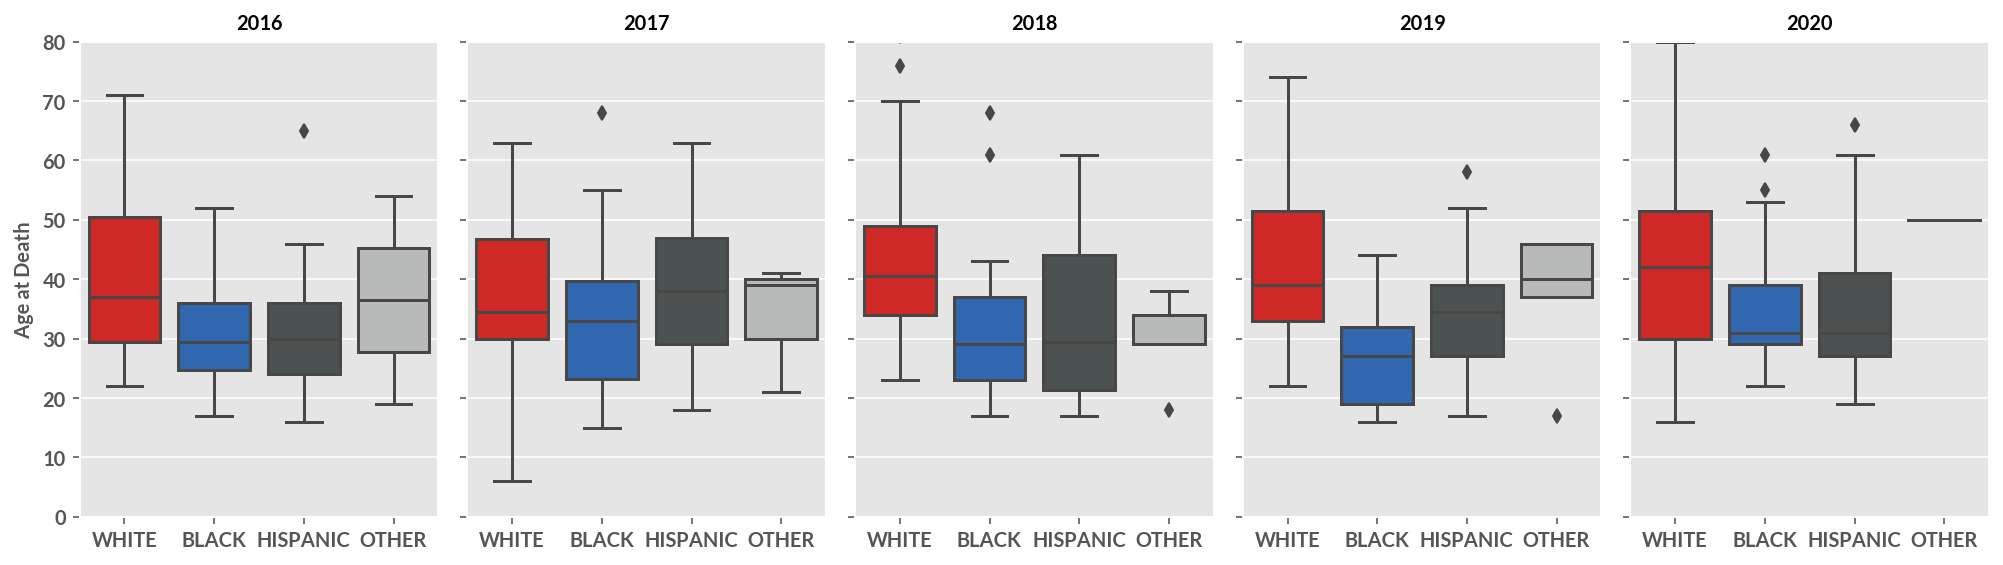

In [91]:
fig, axes = plt.subplots(1, len(years), figsize=(width_heatmap, 4), sharey=True)
for i, (year, ax) in enumerate(zip(years, axes)):
    
    df_temp = df_cd_died[df_cd_died['year']==year]
    ax = sns.boxplot(x='civilian_race', y='civilian_age', data=df_temp, order=race_list, ax=ax)
    ax.set(ylim=(0, 80))
    if i == 0:
        ax.set_ylabel('Age at Death', fontsize=10)
    else:
        ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xticklabels(race_list, fontsize=10)
    ax.set_title(year, fontsize=10)
    
    for i, col in enumerate(cols_race):
        mybox = ax.artists[i]
        mybox.set_facecolor(col)
    
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_22.eps')

# 6. Causes of incidents that precede shootings

## Categories

In [92]:
incident_causes_list

['Traffic Stop',
 'Emergency/Request for Assistance',
 'Execution of a Warrant',
 'Hostage/Barricade/Other Emergency',
 'Other']

In [93]:
incident_causes_list_sorted = df_cd[incident_causes_list].sum(axis=0).sort_values(ascending=False).index
print(incident_causes_list_sorted)

Index(['Emergency/Request for Assistance', 'Other', 'Traffic Stop',
       'Execution of a Warrant', 'Hostage/Barricade/Other Emergency'],
      dtype='object')


## Frequency per category

In [94]:
df_cd[incident_causes_list_sorted].sum()

Emergency/Request for Assistance     479
Other                                200
Traffic Stop                         102
Execution of a Warrant                87
Hostage/Barricade/Other Emergency     22
dtype: int64

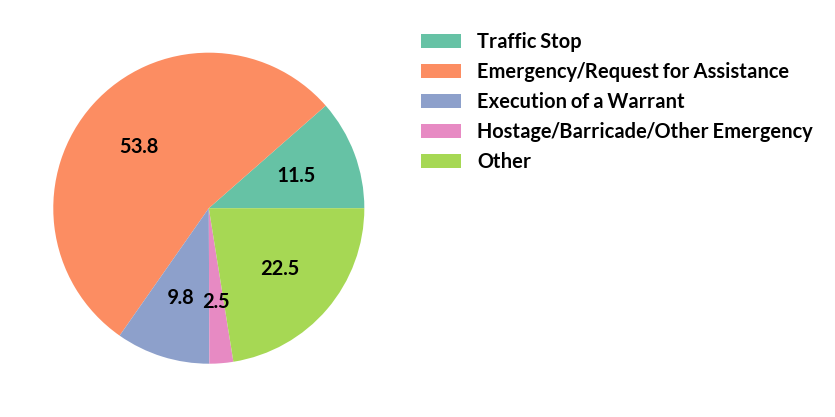

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df_cd[incident_causes_list].sum().plot(kind='pie', autopct='%.1f', colors=colors_, labels=['','','','',''], ax=ax, fontsize=10)
ax.legend(incident_causes_list, bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(ylabel='')
fig.tight_layout();

Sanity check: OAG data

In [96]:
df_oag_incident_cause_counts = df_oag.iloc[-5:, :].sum(axis=1).loc[['TRAFFIC STOP', 'EMERGENCY CALL', 'EXECUTION OF A WARRANT', 
                                                                    'HOSTAGE, BARRICADE AND OTHER EMERGENCY', 'OTHER']]

In [97]:
df_oag_incident_cause_counts

TRAFFIC STOP                              131
EMERGENCY CALL                            446
EXECUTION OF A WARRANT                    104
HOSTAGE, BARRICADE AND OTHER EMERGENCY    115
OTHER                                     225
dtype: int64

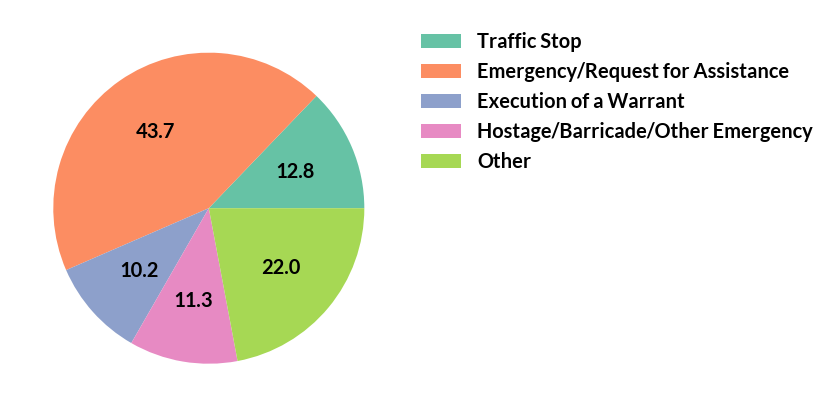

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df_oag_incident_cause_counts.plot(kind='pie', autopct='%.1f', colors=colors_, labels=['','','','',''], ax=ax, fontsize=10)
ax.legend(incident_causes_list, bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(ylabel='')
fig.tight_layout();

Our data is not too different from OAG data except that we have more "Emergency" causes and fewer "Hostage" causes.

In [99]:
df_oag_incident_cause_counts.values - df_cd[incident_causes_list].sum().values

array([ 29, -33,  17,  93,  25])

### FIGURE 23. SEVERITY OF CIVILIAN SHOOTINGS BY INCIDENT CAUSE

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


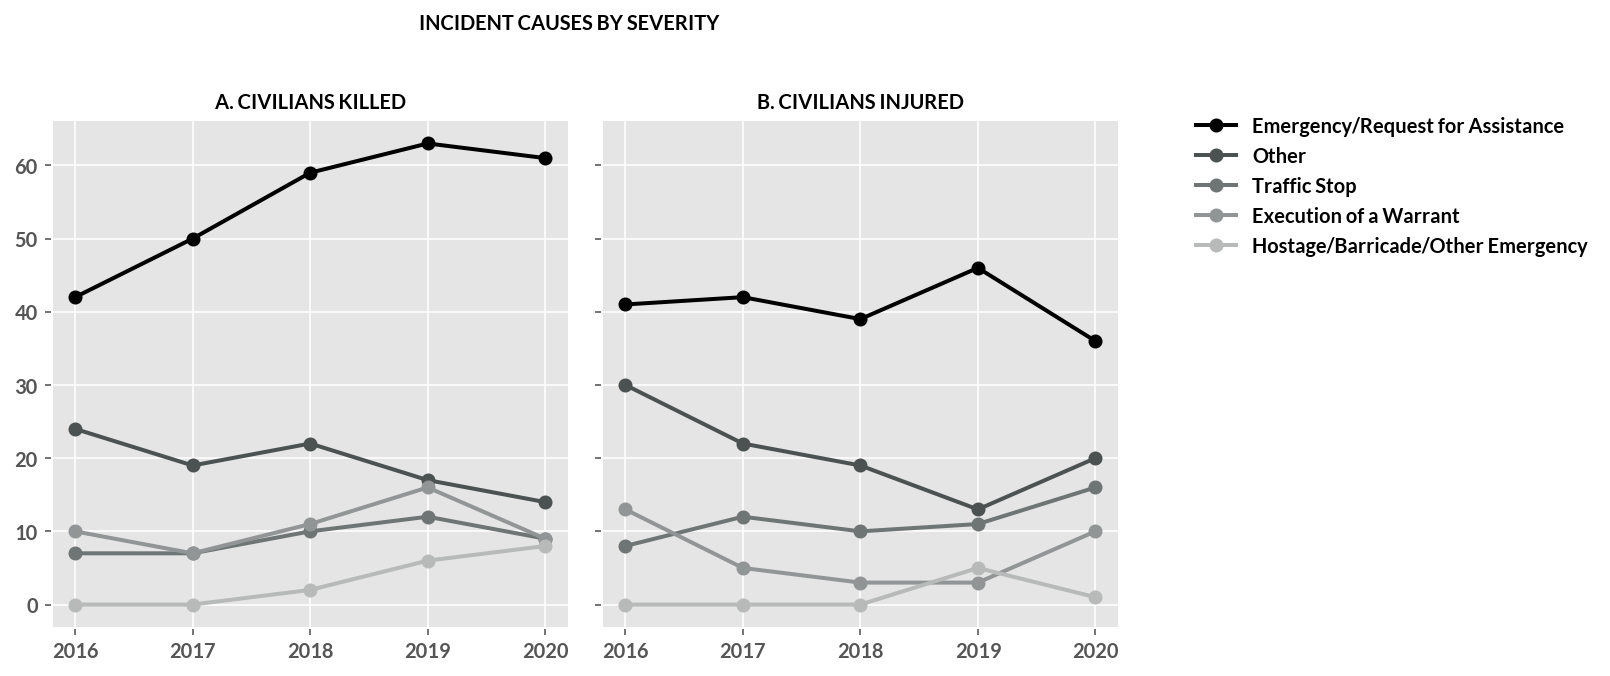

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)
df_cd[df_cd['died']].groupby('year')[incident_causes_list_sorted].sum().plot(kind='line', color=cols_incident_causes, ax=axes[0], marker='o', lw=2, legend=False)
axes[0].set(xlabel='', xticks=years, xticklabels=years)
axes[0].set_title('A. Civilians killed'.upper(), fontsize=10)
df_cd[~df_cd['died']].groupby('year')[incident_causes_list_sorted].sum().plot(kind='line', color=cols_incident_causes, ax=axes[1], marker='o', lw=2, legend=False)
axes[1].set(xlabel='', xticks=years, xticklabels=years)
axes[1].set_title('B. Civilians injured'.upper(), fontsize=10)

fig.suptitle('Incident Causes by Severity'.upper(), fontsize=10, x=0.5, y=1.03)
fig.legend(incident_causes_list_sorted, ncol=1, bbox_to_anchor=(0.9, 0, 0.5, 0.9), fontsize=10)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_23.eps', bbox_inches='tight')

## The "Other" category

In [101]:
df_cd[incident_causes_list].sum()

Traffic Stop                         102
Emergency/Request for Assistance     479
Execution of a Warrant                87
Hostage/Barricade/Other Emergency     22
Other                                200
dtype: int64

## Overrepresentation of "other" in non-white population (metropolitan)

In [102]:
df_cd_incident_race_top5 = df_cd_top5.groupby('civilian_race')[incident_causes_list_sorted].sum().loc[race_list, incident_causes_list_sorted]
df_cd_incident_race_top5_pct = preprocess.pct(df_cd_incident_race_top5, 0)
df_cd_incident_race_top5

,Emergency/Request for Assistance,Other,Traffic Stop,Execution of a Warrant,Hostage/Barricade/Other Emergency
civilian_race,,,,,
WHITE,64,21,11,12,5
BLACK,83,63,13,13,0
HISPANIC,83,32,16,10,2
OTHER,7,3,3,1,1


### FIGURE 24. RACE DEMOGRAPHICS BY INCIDENT CAUSE (TOP 5 COUNTIES)

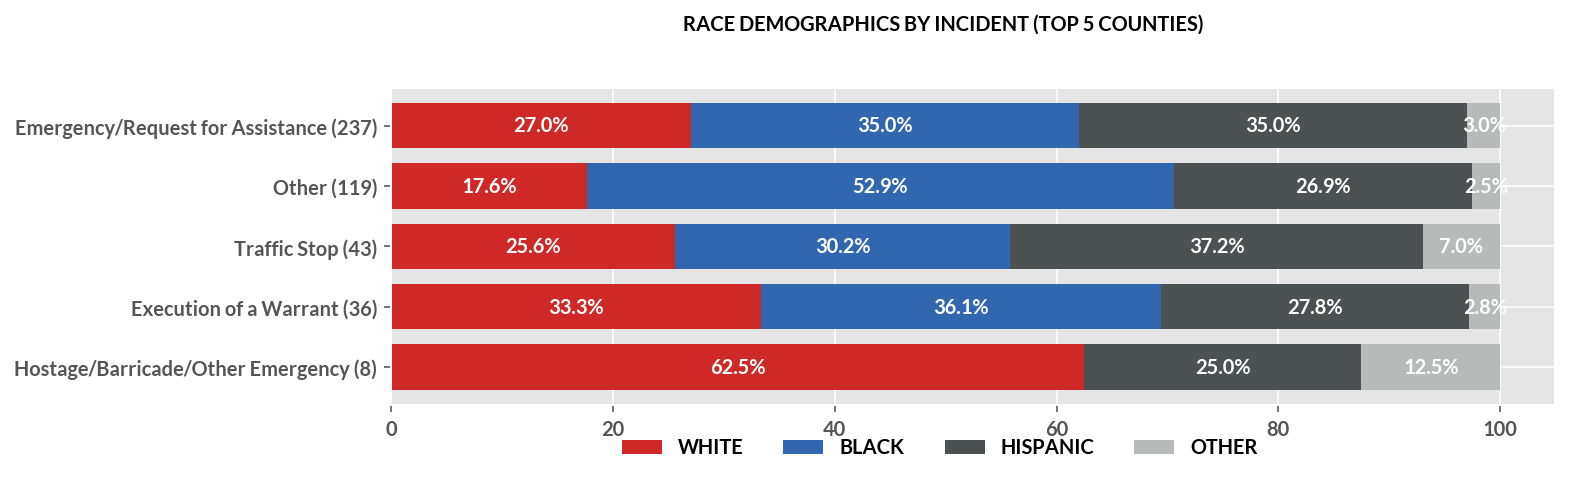

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(11, 3))
df_cd_incident_race_top5_pct.T[::-1].plot(kind='barh', stacked=True, ax=ax, legend=False, width=0.75, color=cols_race)
plot.annotate(ax, 'h', 'percent', fontsize=10)
ax.set_yticklabels([s + ' ({})'.format(n) for s, n in zip(df_cd_incident_race_top5.columns, 
                                                          df_cd_incident_race_top5.sum(axis=0).values)][::-1], fontsize=10)
fig.legend(race_list, ncol=4, bbox_to_anchor=(0.81, 0.09), fontsize=10)

fig.suptitle('Race demographics by incident (top 5 counties)'.upper(), fontsize=10, x=0.6, y=1.03)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_24.eps', bbox_inches='tight')

# 7. Report lag

Law enforcement agencies are required to file an incident report to the OAG within 30 days of a shooting. In 2017, the data set started to include the date that reports were submitted to the OAG. 

## Computing the lag by year

In [104]:
df_cd['delay_bin_label'].unique()

array([-1,  7,  6,  2,  5,  3,  4,  1,  8,  0,  9])

In [105]:
bins = [0, 7, 14, 30, 60, 90, 180, 360, 720]
binnames = ['Same Day'] + ['{} to {} Days'.format(bins[i]+1, bins[i+1]) for i in range(len(bins)-1)] + ['More than 720 Days']
print(len(bins), len(binnames), binnames)

9 10 ['Same Day', '1 to 7 Days', '8 to 14 Days', '15 to 30 Days', '31 to 60 Days', '61 to 90 Days', '91 to 180 Days', '181 to 360 Days', '361 to 720 Days', 'More than 720 Days']


In [106]:
df_cd_delay_year = df_cd[(df_cd['delay_bin_label'] != -1) & (df_cd['year'] > 2016)].groupby(['delay_bin_label', 'year'])['date_incident'].count().unstack().fillna(0)
df_cd_delay_year

year,2017,2018,2019,2020
delay_bin_label,,,,
0,3.0,5.0,3.0,4.0
1,44.0,51.0,65.0,54.0
2,35.0,38.0,37.0,35.0
3,54.0,60.0,62.0,56.0
4,13.0,12.0,11.0,15.0
5,1.0,2.0,1.0,5.0
6,4.0,2.0,6.0,6.0
7,0.0,1.0,0.0,2.0
8,2.0,1.0,0.0,0.0


### FIGURE 25. INCIDENTS BY LENGTH OF REPORT LAG

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


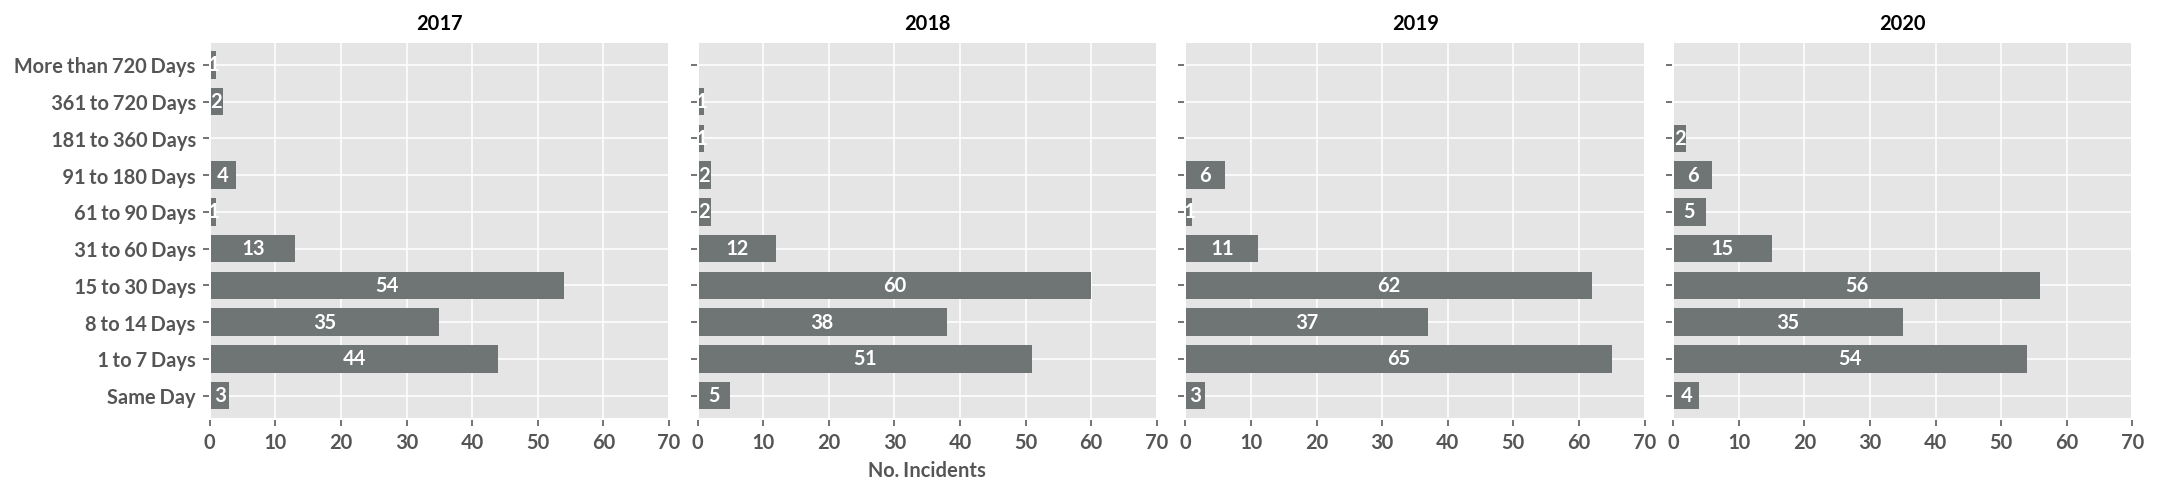

In [107]:
fig, axes = plt.subplots(1, len(years[1:]), figsize=(15, 3.5), sharey=True)
for i, (year, ax) in enumerate(zip(years[1:], axes)):
    
    df_cd_delay_year[year].plot(kind='barh', color=cols_bar, ax=ax, legend=False, width=0.75)
    ax.set(xlim=(0,70), ylabel='')
    ax.set_title(year, fontsize=10)
    if i == 1:
        ax.set(xlabel='No. Incidents')
    else:
        ax.set_xlabel(None)
    ax.set_yticklabels(binnames, fontsize=10)
    plot.annotate(ax, 'h', fontsize=10)
    
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_25.eps')

## Counties with most number of delayed reports

In [108]:
df_cd['delayed_reports'] = df_cd['delay_days']>30
top5_locs_delays = df_cd[df_cd['delayed_reports']].groupby(['incident_county'])['date_incident'].count().sort_values(ascending=False)[:5].index
print(top5_locs_delays)

Index(['HARRIS', 'BEXAR', 'TARRANT', 'WEBB', 'BELL'], dtype='object', name='incident_county')


### FIGURE 26. INCIDENTS BY LENGTH OF REPORT LAG (TOP 5 COUNTIES)

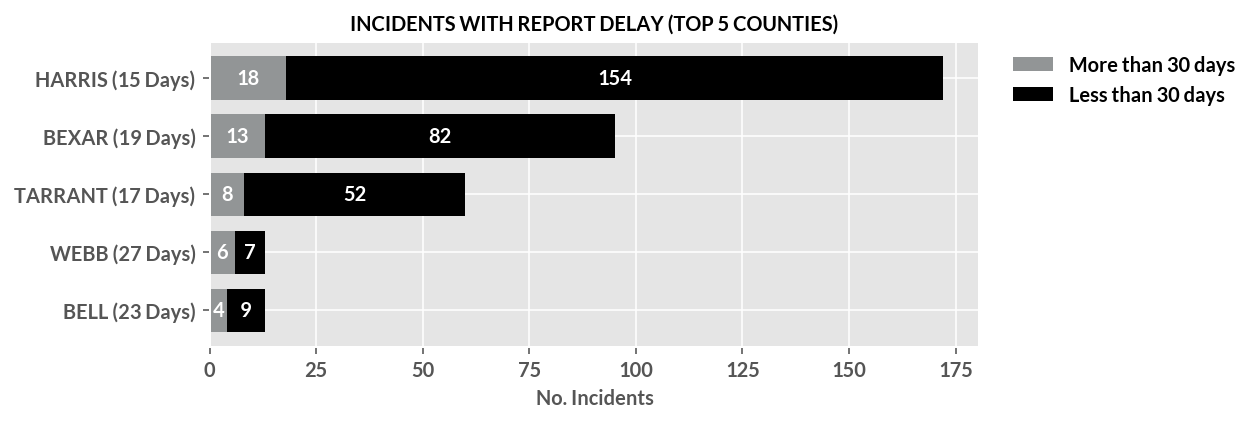

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

df_cd_top5_delays = df_cd[df_cd['incident_county'].isin(top5_locs_delays)].groupby(['incident_county','delayed_reports'])['date_incident'].count().unstack()
df_cd_top5_delays.loc[top5_locs_delays, [1, 0]][::-1].plot.barh(stacked=True, legend=False, rot=0, color=cols_oag_tji, ax=ax, width=0.75)

medians = df_cd.groupby('incident_county')['delay_days'].median().loc[top5_locs_delays]
yticklabels = ['{} ({:.0f} Days)'.format(city, median) for city, median in medians.items()]

ax.set(xlabel='No. Incidents', ylabel='', yticklabels=yticklabels[::-1])
ax.set_title('incidents with report delay (top 5 counties)'.upper(), fontsize=10)
plot.annotate(ax, 'h', fontsize=10)

fig.legend(['More than 30 days', 'Less than 30 days'], bbox_to_anchor=(0.75, 0, 0.5, 0.9), fontsize=10)
fig.tight_layout()
# fig.savefig('../Figures/Notebook/Figure_26.eps', bbox_inches='tight')

In [110]:
df_cd.groupby('incident_county')['delay_days'].median().loc[top5_locs_delays]

incident_county
HARRIS     15.0
BEXAR      19.0
TARRANT    17.0
WEBB       27.0
BELL       23.0
Name: delay_days, dtype: float64

## Officer vs. civilian report lag

In [111]:
print(df_cd['delay_days'].median())
print(df_os['delay_days'].median())

14.0
21.0
